# Business Analysis Project- Yandex.Afisha

## Project description
Yandex.Afisha is a service created by Yandex and Afisha, the top Russian site for films and television programs. This service allowes Russians to search showtimes of plays and films through-out Russia, check availability of tickets, and pre-purchase them online.

As an intern in the analytical department at Yandex.Afisha I have been given the task to explore:
- How people use the product?
- When do they start to buy?
- How much money each customer brings?
- When do they pay off?
By this exploration i would like to get some important insights to customers' behavior and advise about ways to help optimize marketing expenses.

In order to achieve this goal, i have been given access to:  
- Server logs with data on Yandex.Afisha visits from June 2017 to June 2018.
- Dump file with all orders for the period.
- Marketing expenses statistics



## Step 1. Download the data and prepare it for analysis

### 1.1 Importing libraries:

In [1]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### 1.2 Loading data:

In [3]:
try:
    orders = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Business Analytics\project BA\orders_log_us.csv")
    visits = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Business Analytics\project BA\visits_log_us.csv")
    costs = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Business Analytics\project BA\costs_us.csv")
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')
                         

### 1.3 Optimizing data:

#### 1.3.1 -  visits dataframe:

In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visits.sort_values(by= 'Start Ts')

,Device,End Ts,Source Id,Start Ts,Uid
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494
...,...,...,...,...,...
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
294423,desktop,2018-05-31 23:59:00,2,2018-05-31 23:59:00,10406407303624848652


#### In visits table:
- there are 5 columns and 359400 rows. 
- No missing values.
- memory usage: 79.3 MB
- Could help to lower case the column names, and add a lower line between words ("_").
- Data types don't all seem to fit our needs:
1. Source Id and Device- I would like to explore its content and see if i can change the dtype to category instead of object.
2. Start_ts and End_ts should be converted to datetime type.

In [6]:
# converting column names to lower-case and adding "_" between words: 
visits.columns= visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [7]:
# checking if i should change device dtype to category: (yes, i should)
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [8]:
visits['device'] = visits['device'].astype('category') 

In [9]:
# checking if i should change source_id dtype to category: (i am not sure, so i'll leave it as is)
visits['source_id'].value_counts()


4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

In [10]:
# converted to datetime type:
visits['start_ts'] =  pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S") 
visits['end_ts'] =  pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S") 
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
# re-checking (see memory usage :-)
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


#### 1.3.2 - orders dataframe:

In [12]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [13]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [14]:
# converting column names to lower-case and adding "_" between words: 
orders.columns= orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [15]:
# converted to datetime type:
orders['buy_ts'] =  pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")

In [16]:
# rechecking:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### 1.3.3 - costs dataframe:

In [17]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [18]:
costs.sample(10)

,source_id,dt,costs
883,3,2017-11-05,363.83
1208,4,2017-09-28,270.94
1495,5,2017-07-14,143.57
474,2,2017-09-20,80.13
1790,5,2018-05-06,100.54
62,1,2017-08-02,25.47
1180,4,2017-08-31,113.23
729,3,2017-06-04,389.87
81,1,2017-08-21,25.09
1681,5,2018-01-16,184.09


In [19]:
# converting to datetime type:
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y-%m-%d")

In [20]:
# converting source_id to 'object', as in the visits table:
costs['source_id'] = costs['source_id'].astype('object')

In [21]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   object        
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 129.2 KB


### 1.4 - Preparing data for analysis: 

In [22]:
#Creating additional date parameters that will help us in cohort analysis:

visits['v_day'] = visits['start_ts'].astype('datetime64[D]').dt.date
visits['v_week'] = visits['start_ts'].astype('datetime64[W]').dt.date
visits['v_month'] = visits['start_ts'].astype('datetime64[M]').dt.date
orders['o_week']  = orders['buy_ts'].astype('datetime64[W]').dt.date
orders['o_month'] = orders['buy_ts'].astype('datetime64[M]').dt.date
costs['c_week']=costs['dt'].astype('datetime64[W]').dt.date
costs['c_month']=costs['dt'].astype('datetime64[M]').dt.date

In [23]:
visits

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01
...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01


## Step 2. Make reports and calculate metrics:

Plot graphs to display how these metrics differ for various devices and ad
sources and how they change in time.

### 2.1 - Product:

### - How many people use it every day, week, and month?


#### Users per day

In [24]:
# users per day:
dau = visits.groupby('v_day')['uid'].nunique().reset_index()
dau

,v_day,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


In [25]:
# mean number of daily active users:
print("The mean number of daily active users was {}".format(round(dau['uid'].mean(), 2)))


The mean number of daily active users was 907.99


In [26]:
# dau median: (prety close to mean)
dau['uid'].median()

921.0

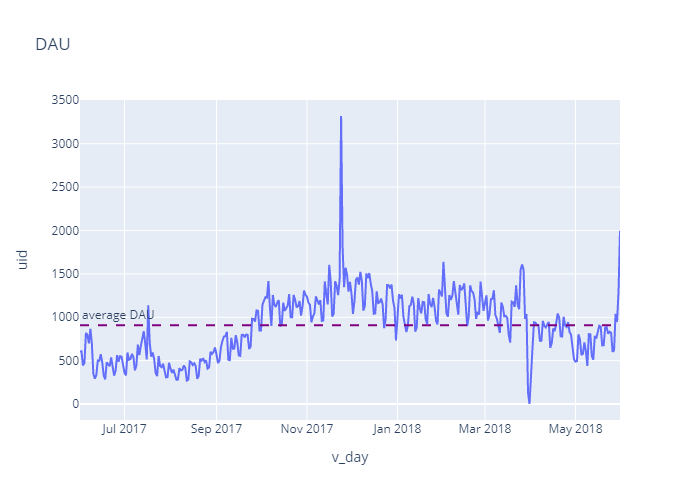

In [27]:

fig = px.line(dau,x='v_day', y='uid',title='DAU')
fig.add_hline(y=dau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show("png");

***The graph shows the daily usage rate of the product. It can be seen that between September 2017 and March 2018 the usage exceeds the general average.***

##### - Users per day grouped according to device type:

In [28]:
dau_by_device = visits.groupby(['v_day', 'device'])['uid'].nunique().reset_index()
dau_by_device

,v_day,device,uid
0,2017-06-01,desktop,455
1,2017-06-01,touch,153
2,2017-06-02,desktop,458
3,2017-06-02,touch,152
4,2017-06-03,desktop,307
...,...,...,...
723,2018-05-29,touch,263
724,2018-05-30,desktop,904
725,2018-05-30,touch,393
726,2018-05-31,desktop,1361


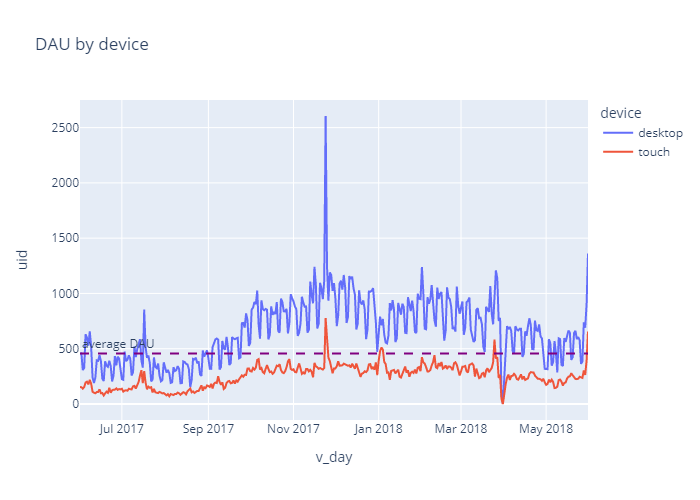

In [29]:
sig = px.line(dau_by_device,x="v_day", y="uid",color = "device", title='DAU by device')
sig.add_hline(y=dau_by_device['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
sig.show("png");

***Looking at the DAU by device type shows a much higher usage rate for users visiting the site from their desktop, compared with touch screen users.*** 

#### Users per week:

In [30]:
# users per week:
wau = visits.groupby('v_week').agg({'uid': 'nunique'}).sort_values(by='uid').reset_index().sort_values(by='v_week')
wau


,v_week,uid
14,2017-06-01,4082
9,2017-06-08,3311
4,2017-06-15,2844
8,2017-06-22,3079
7,2017-06-29,3055
12,2017-07-06,3563
20,2017-07-13,4790
6,2017-07-20,2978
2,2017-07-27,2505
1,2017-08-03,2343


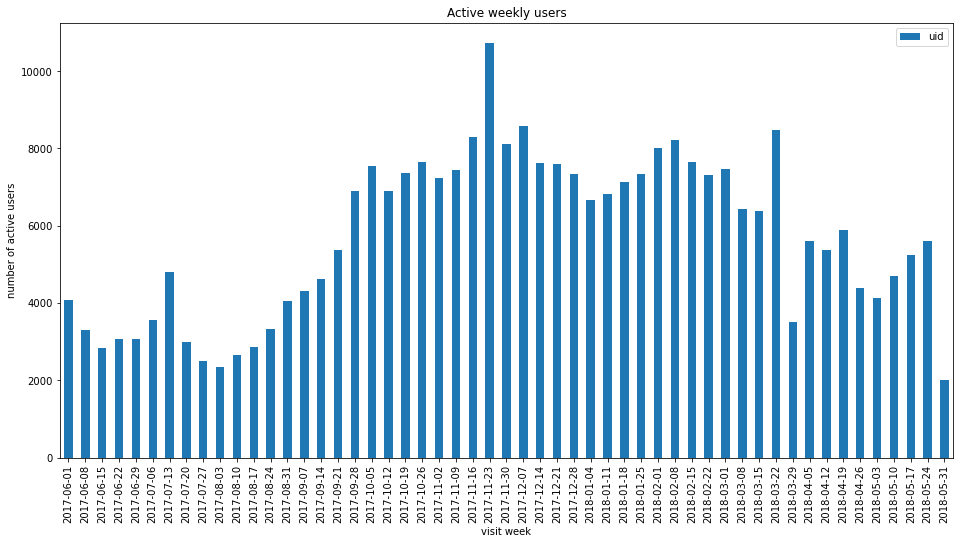

In [31]:
wau.plot(x ='v_week', y='uid', kind = 'bar', figsize=(16, 8), title= "Active weekly users")
plt.xlabel('visit week')
plt.ylabel('number of active users')
plt.show();

In [32]:
# mean number of weekly active users:
print("The mean number of weekly active users was {}".format(wau['uid'].mean()))

The mean number of weekly active users was 5724.415094339623


#####  - WAU grouped according to device type:

In [33]:
wau_by_device = visits.groupby(['v_week', 'device'])['uid'].nunique().reset_index()
wau_by_device.head()

,v_week,device,uid
0,2017-06-01,desktop,3015
1,2017-06-01,touch,1110
2,2017-06-08,desktop,2431
3,2017-06-08,touch,899
4,2017-06-15,desktop,2168


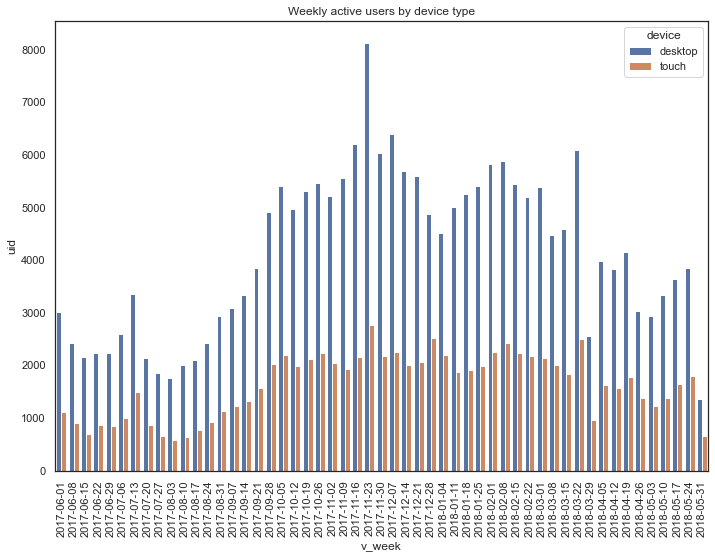

In [34]:
# creating a grouped bar plot for the two devices:
sns.set(style='white', rc={'figure.figsize':(11.7,8.27)})      
sns.barplot(x='v_week', y='uid', hue='device', data=wau_by_device).set(title="Weekly active users by device type")
plt.xticks(rotation=90);

***The usage pattern across weeks seems similar for both device types (peaks emerge on the same weeks). However- clearly, the number of weekly active users is much larger for desktop users than for touch-screen users, on any given week. WAU on touch is about a third of the WAU of desktop users. Maybe the app doesn't run as good on touch devices.


#### users per month:

In [35]:

mau = visits.groupby('v_month').agg({'uid': 'nunique'}).sort_values(by='uid').reset_index()
mau    

,v_month,uid
0,2017-08-01,11631
1,2017-06-01,13259
2,2017-07-01,14183
3,2017-09-01,18975
4,2018-05-01,20701
5,2018-04-01,21008
6,2018-03-01,27473
7,2018-01-01,28716
8,2018-02-01,28749
9,2017-10-01,29692


In [36]:
# mean number of monthly active users:
print("The mean number of monthly active users was {}".format(mau['uid'].mean()))

The mean number of monthly active users was 23228.416666666668


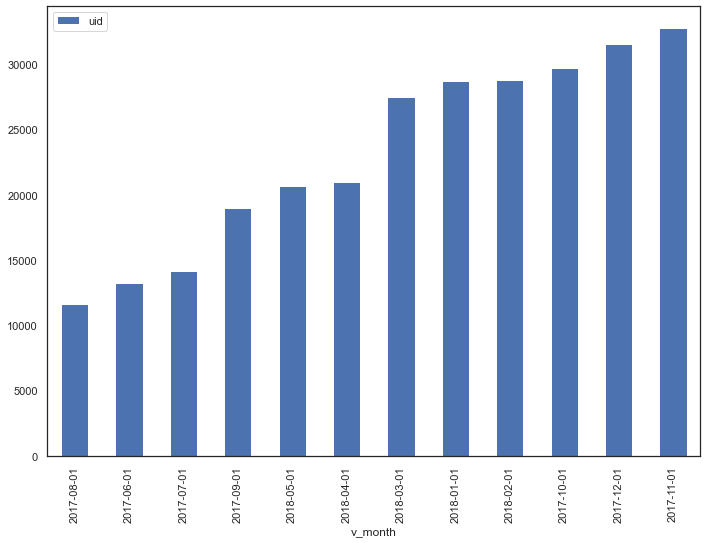

In [37]:
mau.plot(x ='v_month', y='uid', kind = 'bar');

**Looks like a seasonality: In the Winter (between October and March) there are more users than in other (warmer?) months. Maybe people tend to go to the movies more when it is cold outside.**

#### -  MAU grouped according to device type:

In [38]:
mau_by_device = visits.groupby(['v_month', 'device'])['uid'].nunique().reset_index()
mau_by_device.head()

,v_month,device,uid
0,2017-06-01,desktop,9761
1,2017-06-01,touch,3655
2,2017-07-01,desktop,10145
3,2017-07-01,touch,4223
4,2017-08-01,desktop,8611


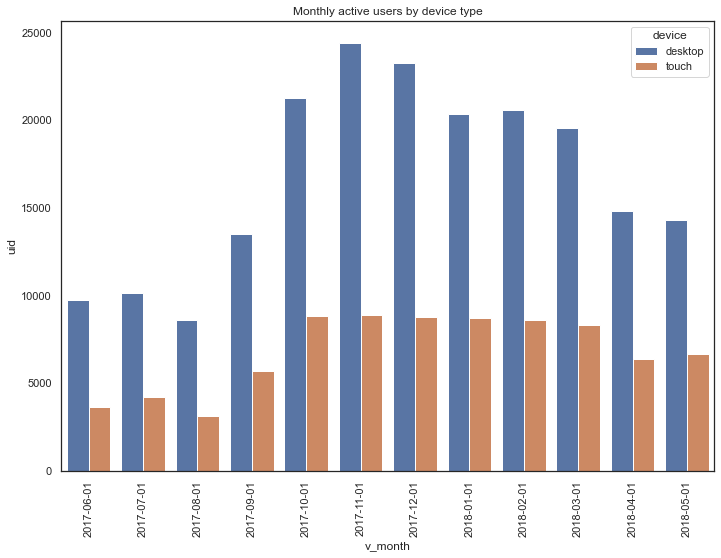

In [39]:
# creating a grouped bar plot for the two devices:
sns.set(style='white', rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='v_month', y='uid', hue='device', data=mau_by_device).set(title="Monthly active users by device type")
plt.xticks(rotation=90);

In [40]:
# Calculating sticky factor:
dau_tot = dau.mean()
wau_tot = wau.mean()
mau_tot = mau.mean()

C:\Users\USER\AppData\Local\Temp/ipykernel_10380/3342028707.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\USER\AppData\Local\Temp/ipykernel_10380/3342028707.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\USER\AppData\Local\Temp/ipykernel_10380/3342028707.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [41]:
sticky_w = dau_tot / wau_tot * 100
sticky_w

uid    15.861739
dtype: float64

In [42]:
sticky_m = dau_tot / mau_tot * 100
sticky_m

uid    3.90897
dtype: float64

**Summary-**
- Users per day: Between one user (31/3/18) and 3319 users (24/11/17)
- Users per week: Between 1997 users (31/5/18) and 10716 users (23/11/17)
- Users per month: Between 11631 users (8/17) and 32797 users (11/17)
***General trends and remarks: *** 
- 1) Users have a clear preference to desktop devices over touch devices.
- 2) There is a seasonality: During Winter (Oct-March) usage rates of product are higher.
- 3) The sticky factor suggests that not too many users tend to enter the site more than once during the week (15.86%) and even less than that durng the month (3.91%).

### - How many sessions are there per day?

In [43]:
dau_new = visits.groupby('v_day')['uid'].agg(['nunique','count']).reset_index()
dau_new = dau_new.rename(columns={'nunique': 'daily_users', 'count': 'daily_sessions'})

dau_new.sort_values(by='daily_sessions')

,v_day,daily_users,daily_sessions
303,2018-03-31,1,1
302,2018-03-30,131,134
73,2017-08-13,281,293
72,2017-08-12,271,296
66,2017-08-06,282,296
...,...,...,...
298,2018-03-26,1609,1796
245,2018-02-01,1640,1878
177,2017-11-25,1817,2089
363,2018-05-31,1997,2256


In [44]:
# average number of daily sessions:
print("Average of daily sessions:",dau_new.daily_sessions.mean(), ", " "median of daily sessions:", dau_new.daily_sessions.median())

Average of daily sessions: 987.3626373626373 , median of daily sessions: 1003.0


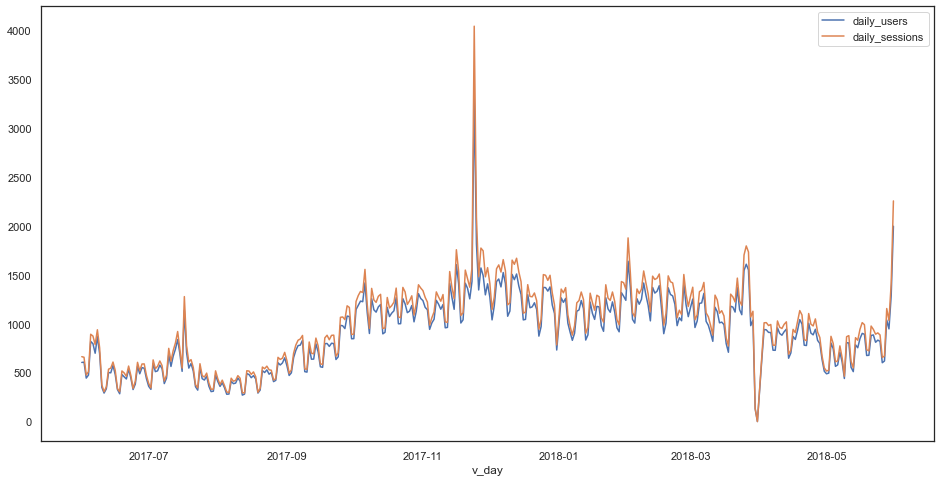

In [45]:
# Showing the dynamics between number of users per day (orange) and the number of sessions a day (blue)

dau_new.plot(x='v_day', y=['daily_users', 'daily_sessions'], figsize=(16, 8));

***From the graph, it looks like the number of users per day and the number of sessions a day tend to correlate. 

#### - Number of sessions grouped by device:


In [46]:
dau_device = visits.groupby(['v_day', 'device'])['uid'].agg(['nunique','count']).reset_index()
dau_device = dau_device.rename(columns={'nunique': 'daily_users', 'count': 'daily_sessions'})
dau_device

,v_day,device,daily_users,daily_sessions
0,2017-06-01,desktop,455,501
1,2017-06-01,touch,153,163
2,2017-06-02,desktop,458,498
3,2017-06-02,touch,152,160
4,2017-06-03,desktop,307,329
...,...,...,...,...
723,2018-05-29,touch,263,284
724,2018-05-30,desktop,904,989
725,2018-05-30,touch,393,421
726,2018-05-31,desktop,1361,1544


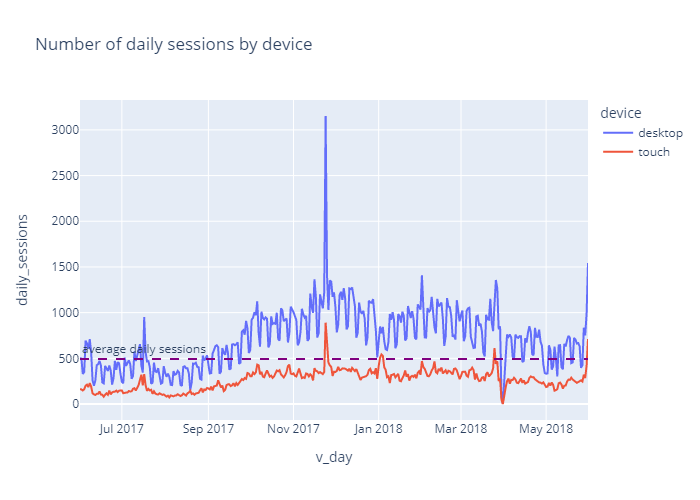

In [47]:
figu = px.line(dau_device,x="v_day", y="daily_sessions",color = "device", title='Number of daily sessions by device')
figu.add_hline(y=dau_device['daily_sessions'].mean(),line_dash="dash", line_color="purple", annotation_text="average daily sessions",
             annotation_position="top left")
figu.show("png");

***Remarks on graph- The general trend of the two graphs is different:*** 
- while the graph illustrating the number of sessions for desk-top users is "spiky" (num of sessions fluctuate more between days), and has a general positive tendency during the winter, the number of sessions using touch devices doesn't rise much through out the year, and the day-to-day usage doesn't fluctuate as much ( might it mean less growth potential?, or more stability of nearly non-use?).

In [48]:
# finding the average number of sessions per user: (quite similar across all days)

dau_new['sessions_per_user'] = dau_new['daily_sessions']/ dau_new['daily_users']
dau_new.sort_values(by='sessions_per_user')

,v_day,daily_users,daily_sessions,sessions_per_user
303,2018-03-31,1,1,1.000000
302,2018-03-30,131,134,1.022901
79,2017-08-19,292,300,1.027397
16,2017-06-17,328,337,1.027439
23,2017-06-24,328,340,1.036585
...,...,...,...,...
181,2017-11-29,1296,1480,1.141975
245,2018-02-01,1640,1878,1.145122
177,2017-11-25,1817,2089,1.149697
180,2017-11-28,1493,1746,1.169457


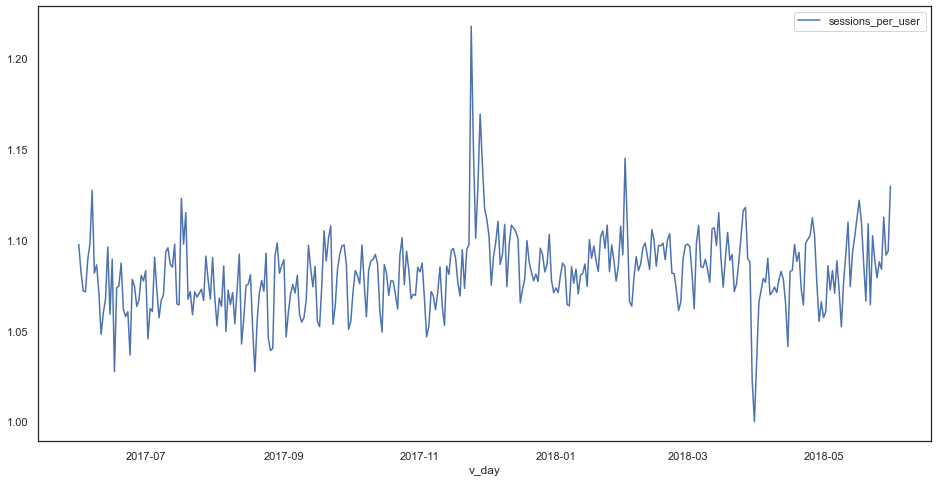

In [49]:
# plot shows the range of fluctuation is not wide (the behavior is quite homogenous):
dau_new.plot(x='v_day', y='sessions_per_user', figsize=(16, 8));

**Number of sessions summary:**
- The number of sessions per day pretty much correlates with the number of users a day: The number of sessions a day per user is not high. This is not surprising as people don't usually go to more than one film a day, so they don't have a reason to order tickets or check availbility more than once or twice.
- Yet, there might be a problem with the application on touch devices, as aside of having less users on these devices, their user behaviour seems to have a some-what flat and low trend.

### - What is the length of each session?

In [50]:
# calculating the session duration indicates some sessions with no duration: (looks like a strange wide range)
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits[['uid', 'v_day', 'session_duration_sec']].sort_values(by='session_duration_sec')

,uid,v_day,session_duration_sec
141591,12556370029787064386,2017-12-20,0
323495,14353490964387083743,2018-05-19,0
251234,8897902106538778380,2017-11-16,0
70714,11870111884570419392,2017-12-18,0
70721,6577122072286955716,2017-07-01,0
...,...,...,...
248062,2909927403543287328,2017-07-27,32880
177381,2909927403543287328,2017-08-01,35760
229891,15566184277200431914,2017-12-18,42660
177972,4621202742905035453,2018-03-25,83640


In [51]:
# furthur exploration of durations shows that 9.96% of sessions started and ended at the same time
visits[visits['session_duration_sec'] == 0]

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month,session_duration_sec
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957,2017-11-09,2017-11-09,2017-11-01,0
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510,2017-11-30,2017-11-30,2017-11-01,0
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332,2018-02-23,2018-02-22,2018-02-01,0
...,...,...,...,...,...,...,...,...,...
358511,desktop,2017-09-15 11:31:00,4,2017-09-15 11:31:00,6406595666419694649,2017-09-15,2017-09-14,2017-09-01,0
358514,desktop,2018-01-16 23:57:00,5,2018-01-16 23:57:00,6457848932283204350,2018-01-16,2018-01-11,2018-01-01,0
358522,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,2017-11-02,2017-11-01,0
358524,touch,2018-01-18 13:38:00,4,2018-01-18 13:38:00,4558073034499185861,2018-01-18,2018-01-18,2018-01-01,0


In [52]:
# since there are almost 10% of sessions that have '0' in duration, i decided to look at the distribution of session duration:
# (and found a right-tailed distribution)
print("the median of session duration is", visits['session_duration_sec'].median(), "seconds")
print("the mean of session duration is", visits['session_duration_sec'].mean(), "seconds")

the median of session duration is 300.0 seconds
the mean of session duration is 643.506488592098 seconds


In [53]:
# Hence, i used the median and not the mean:
duration_p_day = visits.groupby('v_day')['session_duration_sec'].median().reset_index().sort_values(by='v_day')
duration_p_day

,v_day,session_duration_sec
0,2017-06-01,300.0
1,2017-06-02,300.0
2,2017-06-03,300.0
3,2017-06-04,240.0
4,2017-06-05,300.0
...,...,...
359,2018-05-27,300.0
360,2018-05-28,240.0
361,2018-05-29,300.0
362,2018-05-30,300.0


In [54]:
# averaging the median values of duration
round(duration_p_day.session_duration_sec.mean(),2)

284.67

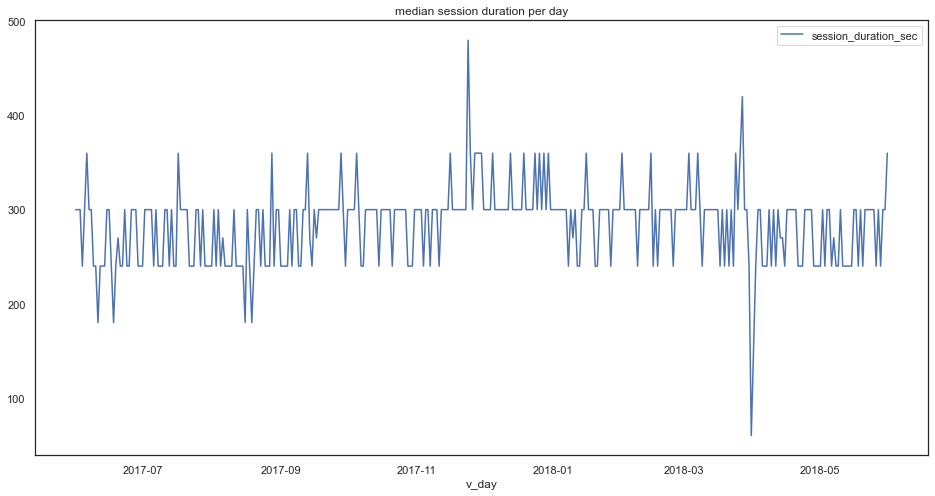

In [55]:
duration_p_day.plot(x ='v_day', y='session_duration_sec', kind = 'line', figsize=(16,8), title='median session duration per day');


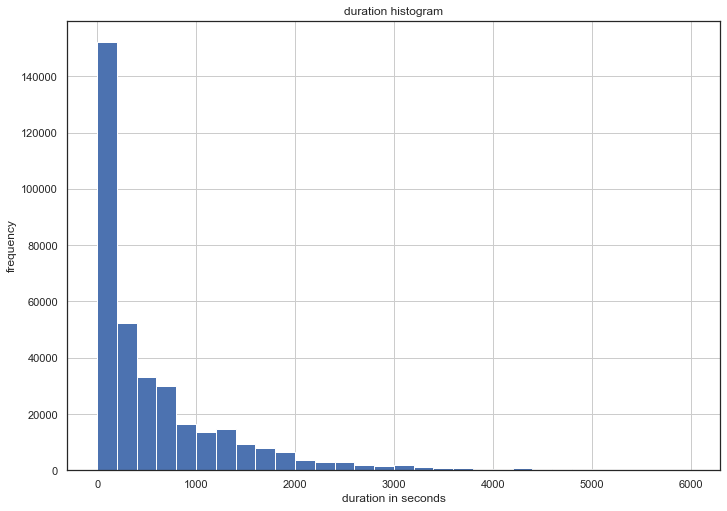

In [56]:
# histogram of duration frequencies in visits dataset:
visits_ = visits[['v_day','session_duration_sec']].sort_values(by='v_day')
visits_.hist(range=(0,6000), bins = 30)
plt.xlabel('duration in seconds')
plt.ylabel('frequency')
plt.title('duration histogram')
plt.show();

In [57]:
# session duration per day- modes and medians:

visits_piv = visits_.pivot_table(
    index= 'v_day',
    values = 'session_duration_sec',
    aggfunc = [lambda x: x.mode().iat[0], 'median'])
visits_piv.columns=['duration_mode', 'duration_median']
visits_piv.reset_index()

,v_day,duration_mode,duration_median
0,2017-06-01,60,300
1,2017-06-02,60,300
2,2017-06-03,60,300
3,2017-06-04,60,240
4,2017-06-05,60,300
...,...,...,...
359,2018-05-27,60,300
360,2018-05-28,60,240
361,2018-05-29,60,300
362,2018-05-30,60,300


The duration distribution shows that this variable doesn't have a normal distribution, and that the vast majority of duration values falls between 0-200 seconds. 
The pivot table helps compare the median  to the mode of duration per day. It seems that the mode value more accurately represents the majority of duration values.

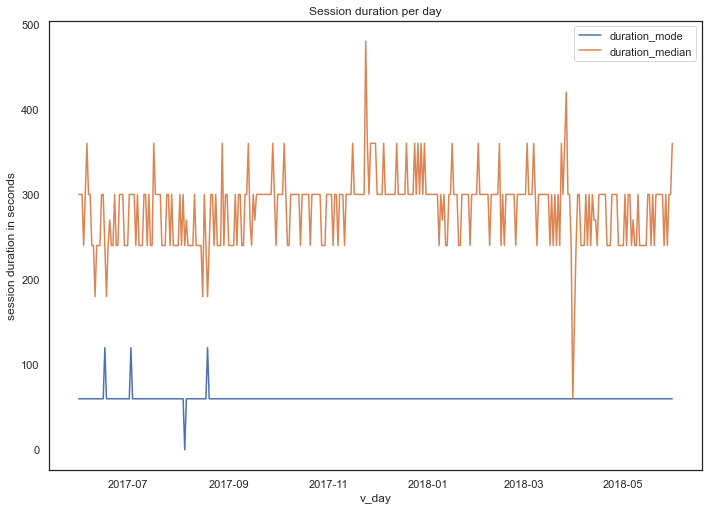

In [58]:
# trying it over with the mode this time:
visits_piv.plot()
plt.ylabel('session duration in seconds')
plt.title("Session duration per day");


**Plot shows that the most common duration per day was 60 seconds through out the year, with a few exceptions of 120 seconds, around June, July and Sep, and one exception of 0 seconds around Aug.

#### Session duration by device:

In [59]:
duration_p_day_dev = visits.groupby(['v_day', 'device'])['session_duration_sec'].median().reset_index()
duration_p_day_dev.head(10)

,v_day,device,session_duration_sec
0,2017-06-01,desktop,300.0
1,2017-06-01,touch,180.0
2,2017-06-02,desktop,300.0
3,2017-06-02,touch,240.0
4,2017-06-03,desktop,360.0
5,2017-06-03,touch,180.0
6,2017-06-04,desktop,300.0
7,2017-06-04,touch,180.0
8,2017-06-05,desktop,300.0
9,2017-06-05,touch,210.0


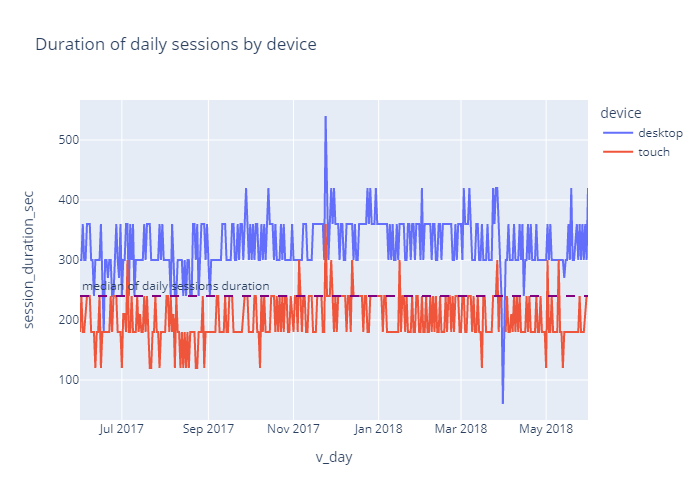

In [60]:
jig = px.line(duration_p_day_dev, x="v_day", y="session_duration_sec",color = "device", title='Duration of daily sessions by device')
jig.add_hline(y=duration_p_day_dev['session_duration_sec'].median(),line_dash="dash", line_color="purple", annotation_text="median of daily sessions duration",
             annotation_position="top left")
jig.show("png");

***Session duration summary: ***
- 10% of users' data might have been not accurate enough when passing from server, as it shows entering time=exiting time. 
- The distribution of session duration is not normal, with mean being almost twice as large as median.
- Session durations in general range between 0 seconds and 84480 seconds (=23.46 hours?).
- Session duration per day ranges between 60 sec and 480 sec (1-8 min).
- It looks like the two device types differ not only on the number of sessions but also on their duration: desktop users seem to stay longer in the site than touch users in the app. 

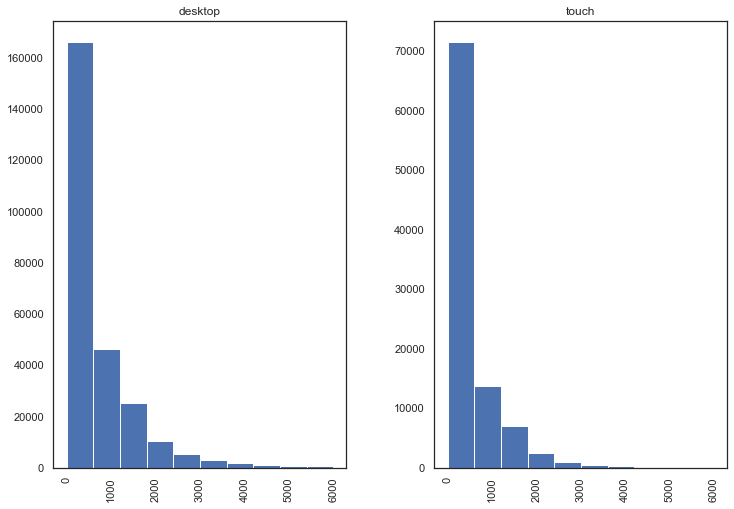

In [61]:
# histograming duration by device:
visits_p_device = visits[['v_day', 'session_duration_sec', 'device']]
visits_p_device.hist(column="session_duration_sec", by="device", range=(0,6000));


In [62]:
# same logic - choosing the mode again:
visits_d_piv = visits_p_device.pivot_table(
    index= 'v_day',
    columns= 'device',
    values = 'session_duration_sec',
    aggfunc = lambda x: x.mode().iat[0])
visits_d_piv.rename(columns=str).reset_index().head()

#visits_d_piv.reset_index().sample(10)

device,v_day,desktop,touch
0,2017-06-01,60.0,60.0
1,2017-06-02,60.0,0.0
2,2017-06-03,60.0,60.0
3,2017-06-04,60.0,60.0
4,2017-06-05,60.0,60.0


In [63]:
# checking for the most frequent duration for both device types: 
desktop_d_m = visits_d_piv.desktop.mode().iat[0]
touch_d_m = visits_d_piv.touch.mode().iat[0]
print(f'The most frequent session duration for desktop users was {desktop_d_m} seconds, and for touch users: {touch_d_m} seconds')


The most frequent session duration for desktop users was 60.0 seconds, and for touch users: 60.0 seconds


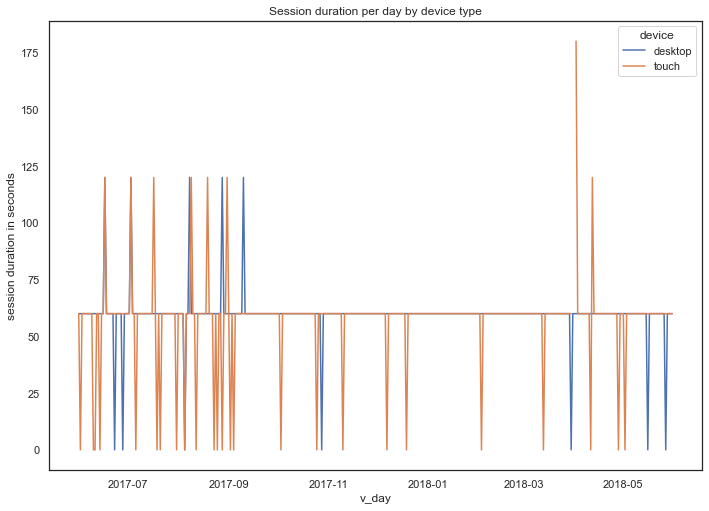

In [64]:

visits_d_piv.plot()
plt.ylabel('session duration in seconds')
plt.title("Session duration per day by device type")
plt.show();

**The plot shows that the most frequent duration is the same for both device types (60 seconds). However, during the year, touch devices users tended to have more days in which their frequent visit durations were 0 seconds, and also more longer durations (120 and 175) compared to the desktop users.**

### - How often do users come back?

In [65]:
# finding the first session for each user:
first_visit = visits.groupby('uid')['v_day'].min().reset_index()
first_visit

,uid,v_day
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30
...,...,...
228164,18446403737806311543,2017-11-30
228165,18446424184725333426,2017-12-06
228166,18446556406699109058,2018-01-01
228167,18446621818809592527,2017-12-27


In [66]:
# renaming
first_visit.columns = ['uid', 'first_session']
first_visit.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [67]:
# merging with the original dataset

visits = visits.merge(first_visit, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month,session_duration_sec,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09


In [68]:
# defining cohort and age parameters in terms of months:


visits['cohort'] = visits['first_session'].astype('datetime64[M]')
visits['cohort_age'] = ((visits['v_day'] - visits['first_session']) / np.timedelta64(1,'M')).round().astype('int')

visits.sample(5)

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month,session_duration_sec,first_session,cohort,cohort_age
353336,touch,2018-02-27 00:32:19,1,2018-02-27 00:32:00,17922803755368507646,2018-02-27,2018-02-22,2018-02-01,19,2018-02-27,2018-02-01,0
6467,desktop,2018-02-26 06:36:00,2,2018-02-26 06:12:00,10403169074343195591,2018-02-26,2018-02-22,2018-02-01,1440,2017-11-23,2017-11-01,3
215901,desktop,2018-05-25 15:52:00,3,2018-05-25 15:52:00,17676755827574367666,2018-05-25,2018-05-24,2018-05-01,0,2018-05-25,2018-05-01,0
165443,desktop,2017-07-27 08:39:00,5,2017-07-27 08:39:00,4877029896525310685,2017-07-27,2017-07-27,2017-07-01,0,2017-07-27,2017-07-01,0
132282,touch,2017-12-16 22:42:00,4,2017-12-16 22:37:00,1790359444918534996,2017-12-16,2017-12-14,2017-12-01,300,2017-12-16,2017-12-01,0


In [69]:
# finding the number of active users at a certain lifetime month for each cohort
cohorts = (
    visits.groupby(['cohort', 'cohort_age'])
    .agg({'uid': 'nunique'})
    .reset_index()) 
cohorts

,cohort,cohort_age,uid
0,2017-06-01,0,13259
1,2017-06-01,1,976
2,2017-06-01,2,718
3,2017-06-01,3,805
4,2017-06-01,4,910
...,...,...,...
85,2018-04-01,0,15709
86,2018-04-01,1,622
87,2018-04-01,2,68
88,2018-05-01,0,15273


In [70]:
# calculating the retention rate: create base user count
initial_users_count = cohorts[cohorts['cohort_age'] == 0][['cohort', 'uid']]
initial_users_count= initial_users_count.rename(columns={'uid':'base_count'})
initial_users_count

,cohort,base_count
0,2017-06-01,13259
13,2017-07-01,13140
25,2017-08-01,10181
36,2017-09-01,16704
46,2017-10-01,25977
55,2017-11-01,27248
63,2017-12-01,25268
70,2018-01-01,22624
76,2018-02-01,22197
81,2018-03-01,20589


In [71]:
# merging with cohorts:
cohorts = cohorts.merge(initial_users_count, on='cohort') 
cohorts['retention'] = cohorts['uid'] / cohorts['base_count'] 
cohorts

,cohort,cohort_age,uid,base_count,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,976,13259,0.073610
2,2017-06-01,2,718,13259,0.054152
3,2017-06-01,3,805,13259,0.060713
4,2017-06-01,4,910,13259,0.068633
...,...,...,...,...,...
85,2018-04-01,0,15709,15709,1.000000
86,2018-04-01,1,622,15709,0.039595
87,2018-04-01,2,68,15709,0.004329
88,2018-05-01,0,15273,15273,1.000000


In [72]:
# create pivot retention table:
retention_pivot = cohorts.pivot_table(
    index='cohort',
    columns='cohort_age',
    values='retention',
    aggfunc='sum')
retention_pivot

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,1.0,0.073610,0.054152,0.060713,0.068633,0.067200,0.063655,0.056037,0.055660,0.050230,0.041255,0.040275,0.012595
2017-07-01,1.0,0.056240,0.052359,0.053196,0.056164,0.049315,0.044673,0.049696,0.036758,0.029604,0.023973,0.005479,NaN
2017-08-01,1.0,0.068952,0.062175,0.058737,0.050781,0.042825,0.041057,0.034378,0.028976,0.023377,0.002848,NaN,NaN
2017-09-01,1.0,0.075670,0.067289,0.048910,0.039511,0.040230,0.033046,0.026102,0.019816,0.002574,NaN,NaN,NaN
2017-10-01,1.0,0.073103,0.052970,0.037995,0.036109,0.031374,0.021096,0.017977,0.003234,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.068739,0.046829,0.038278,0.031342,0.024222,0.018497,0.002752,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.050974,0.041080,0.028930,0.021569,0.016384,0.002770,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.053439,0.036289,0.025548,0.017150,0.001945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.047889,0.026850,0.018020,0.002027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# cumulative retention
retention_pivot_cum = cohorts.pivot_table(
    index='cohort',
    columns='cohort_age',
    values='retention',
    aggfunc='sum').cumsum(axis=1)
retention_pivot_cum

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,1.0,1.073610,1.127762,1.188476,1.257108,1.324308,1.387963,1.444000,1.499661,1.549891,1.591146,1.631420,1.644015
2017-07-01,1.0,1.056240,1.108600,1.161796,1.217960,1.267275,1.311948,1.361644,1.398402,1.428006,1.451979,1.457458,NaN
2017-08-01,1.0,1.068952,1.131127,1.189863,1.240644,1.283469,1.324526,1.358904,1.387879,1.411256,1.414105,NaN,NaN
2017-09-01,1.0,1.075670,1.142960,1.191870,1.231382,1.271612,1.304658,1.330759,1.350575,1.353149,NaN,NaN,NaN
2017-10-01,1.0,1.073103,1.126073,1.164068,1.200177,1.231551,1.252647,1.270624,1.273858,NaN,NaN,NaN,NaN
2017-11-01,1.0,1.068739,1.115568,1.153846,1.185188,1.209410,1.227907,1.230659,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,1.050974,1.092053,1.120983,1.142552,1.158936,1.161707,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,1.053439,1.089728,1.115276,1.132426,1.134371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,1.047889,1.074740,1.092760,1.094788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


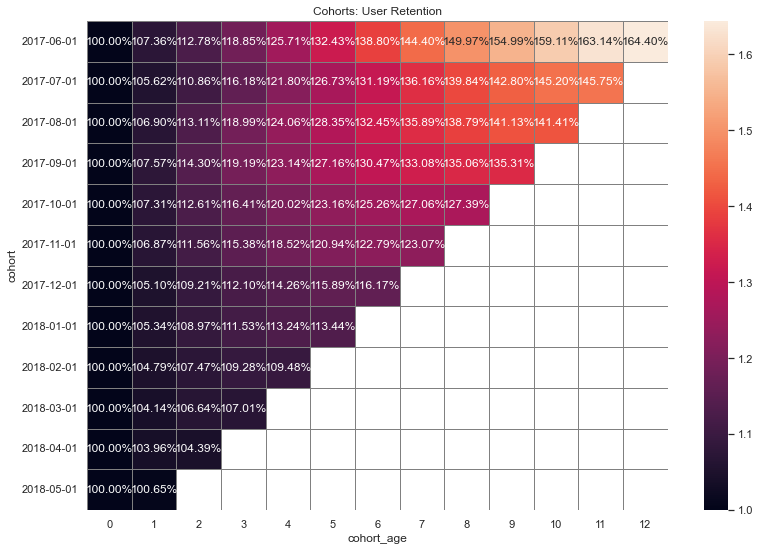

In [74]:
# creating a heatmap:
retention_pivot_cum.index = retention_pivot_cum.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot_cum, annot=True, fmt='.2%', linewidths=1, linecolor='gray'); 


***Users' retention rate- summary***
Looking at the heat-map it is obvious that users don't tend to come back that often: 
- For all cohorts, retention drops steeply after the first month of use: at best, only 7% of the users come back to the site again.
- The first-month retention rate is decreasing for each new cohort, but in a slow pace: Whereas the first-month retention rate for the cohort that joined between june and july of 2017 was 7.36%, for the April-May 2018 cohort it was 3.96%. So in ten months the retention rate fell by only 3.4 percentage points.
- July 2017 cohort behaves a bit different with lower retention rates than expected (looking at the general pace of the decrease in retention rates, by cohort).
- in the previous analyses (general amount of users) we identified a very distinct winter seasonality. In the current retention rate analysis did not show a clear seasonality trend. There is a very slight trend of increased retention rates during (Oct-Dec), for the first and second cohorts. It is not clear if it has any relation to the season.
- Looking at a period of 6 months, the cohort with the highest retention rates is the first one (June 2017).


### 2.2 Sales - 

### When do people start buying? - conversion rate


In [75]:
# just as a reminder for myself..
orders.head(2)

,buy_ts,revenue,uid,o_week,o_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01


In [76]:
# finding the first order for each user:

first_orders = orders.groupby(['uid'])['buy_ts'].min().dt.date.reset_index()
first_orders

,uid,buy_ts
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24
...,...,...
36518,18445147675727495770,2017-11-24
36519,18445407535914413204,2017-09-22
36520,18445601152732270159,2018-03-26
36521,18446156210226471712,2018-02-18


In [77]:
# renaming
first_orders.columns = ['uid', 'first_order']
first_orders.head(3)

,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11


In [78]:
# merging
visit2order = first_orders.merge(first_visit, on='uid', how='left')
visit2order

,uid,first_order,first_session
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24
...,...,...,...
36518,18445147675727495770,2017-11-24,2017-08-20
36519,18445407535914413204,2017-09-22,2017-09-22
36520,18445601152732270159,2018-03-26,2017-08-07
36521,18446156210226471712,2018-02-18,2017-11-07


In [79]:
#Calculating the conversion rate:
cr= round((visit2order['uid'].nunique()/visits['uid'].nunique())*100, 2)
print(cr, "% of users visiting the site converted into buyers.")

16.01 % of users visiting the site converted into buyers.


In [80]:
# calculating conversion time- the number of days between visiting and ordering

visit2order['conversion']=((pd.to_datetime(visit2order['first_order'])-pd.to_datetime(visit2order['first_session']))/np.timedelta64(1,'D')).astype('int')
visit2order.conversion.value_counts().head(20)


0     25039
1      1966
2       685
3       452
4       386
5       307
6       264
7       237
8       216
9       162
10      135
13      126
14      123
11      121
15      116
21      113
17       97
18       95
20       92
12       91
Name: conversion, dtype: int64

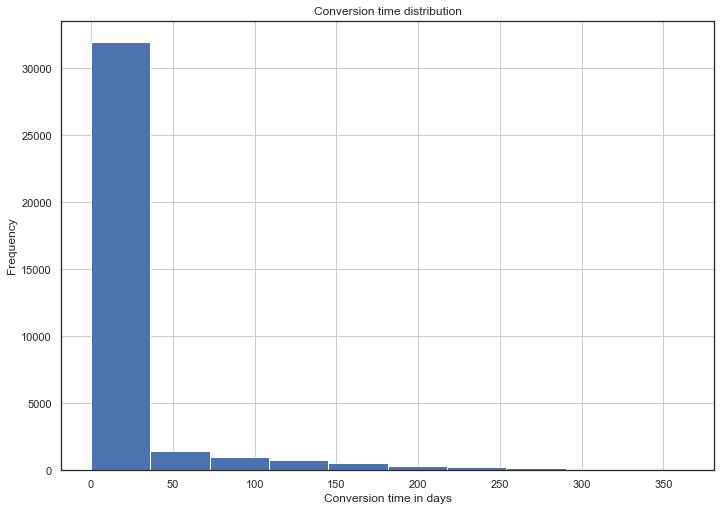

In [81]:
# Creating a histogram to show the distribution of the conversion time:
visit2order['conversion'].hist()
plt.xlabel('Conversion time in days')
plt.ylabel('Frequency')
plt.title('Conversion time distribution')
plt.show();

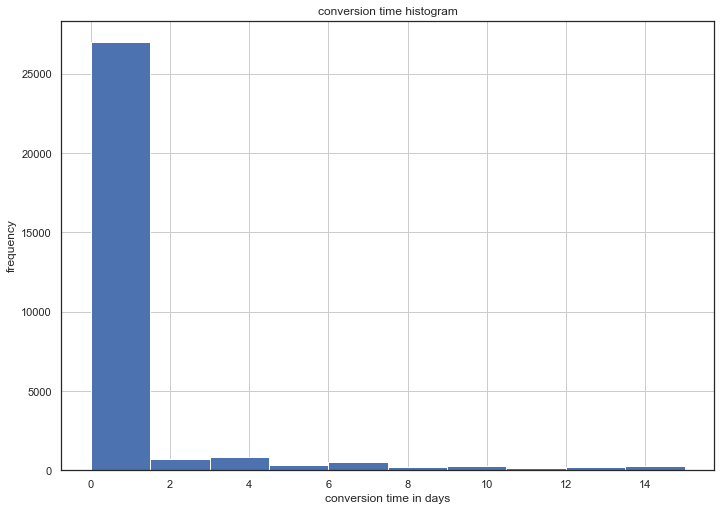

In [82]:
# narrowing the range:
visit2order['conversion'].hist(range=(0, 15))
plt.xlabel('conversion time in days')
plt.ylabel('frequency')
plt.title('conversion time histogram')
plt.show();


In [83]:
visit2order['conversion'].mode()

0    0
dtype: int32

###### **The histogram and table show that users spend between 0 days to 363 days before they order. However, the vast majority of users (27,690) don't need more than 2 days to place their order, with the most frequent time being '0' days: placing an order the same day as the visit.**

###  How many orders do they make during a given period of time?

In [84]:
#merging first_orders with orders (visit2order was formed using an inner join, and hence didn't include all purchase-relevant data):
orders = orders.merge(first_orders, on='uid', how='left')
orders

,buy_ts,revenue,uid,o_week,o_month,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-31


In [85]:
#defining cohort month according to first purchase:
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders

,buy_ts,revenue,uid,o_week,o_month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-31,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-31,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-31,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-31,2018-05-01


In [86]:
# defining cohort size: how many buyers does each cohort include? 
cohort_sizes = orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns=['first_order_month','cohort_size']
cohort_sizes

,first_order_month,cohort_size
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [87]:
#calculating number of purchases for cohort and month
cohort = orders.groupby(['first_order_month','o_month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','order_month','orders']
cohort



,first_order_month,order_month,orders
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292
...,...,...,...
74,2018-03-01,2018-05-01,176
75,2018-04-01,2018-04-01,2495
76,2018-04-01,2018-05-01,195
77,2018-05-01,2018-05-01,3249


In [88]:
#merge cohort with cohort size
cohort = cohort.merge(cohort_sizes,on='first_order_month')

cohort.head()

,first_order_month,order_month,orders,cohort_size
0,2017-06-01,2017-06-01,2354,2023
1,2017-06-01,2017-07-01,177,2023
2,2017-06-01,2017-08-01,174,2023
3,2017-06-01,2017-09-01,226,2023
4,2017-06-01,2017-10-01,292,2023


In [89]:
# preparing to build a cohort table:
cohort['age_month'] = ((pd.to_datetime(cohort['order_month']) - pd.to_datetime(cohort['first_order_month']))/ np.timedelta64(1,'M')).round().astype('int') 
cohort['orders_per_buyer'] = cohort['orders'] / cohort['cohort_size']
cohort.sort_values(by='orders_per_buyer')


,first_order_month,order_month,orders,cohort_size,age_month,orders_per_buyer
21,2017-07-01,2018-04-01,24,1923,9,0.012480
55,2017-11-01,2018-04-01,59,4081,5,0.014457
66,2018-01-01,2018-04-01,64,3373,3,0.018974
71,2018-02-01,2018-05-01,70,3651,3,0.019173
61,2017-12-01,2018-04-01,86,4383,4,0.019621
...,...,...,...,...,...,...
42,2017-10-01,2017-10-01,4964,4340,0,1.143779
57,2017-12-01,2017-12-01,5052,4383,0,1.152635
0,2017-06-01,2017-06-01,2354,2023,0,1.163618
72,2018-03-01,2018-03-01,4130,3533,0,1.168978


In [90]:
#cohort pivot-table:
cohort_piv=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum')

cohort_piv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11-01,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02-01,1.12,0.06,0.02,0.02,,,,,,,,


In [91]:
# cummolative cohort pivot-table:
cohort_cum=cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='orders_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

cohort_cum.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


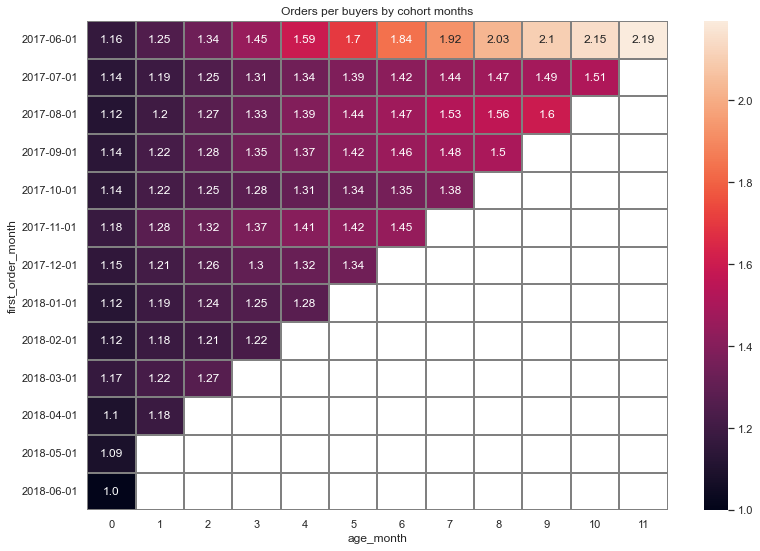

In [92]:
cohort_cum.index = cohort_cum.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Orders per buyers by cohort months')
sns.heatmap(cohort_cum, annot=True, linewidths=2, linecolor='gray', fmt='.3'); 

***How many orders are made- Summary***
- The rate of orders per buyers (opb) ranged between 0.012 opb and 1.179 opb, which isn't much. At most, customers placed a bit more than one order on average.
- Analyzing by cohort indicates that in all cohorts, the greatest number of orders was placed in the first month.
- Observing the cumulative amount of orders shows that the first cohort (June 2017) made the most orders, compared to the other cohorts. This was in spite having the same amount of orders in the first month of purchase. 
- Seems that in this cohort, the number of orders per user was slightly higher than the rest all year round.

### What is the average purchase size?

In [93]:
# calculating the general average price: 
avg_rev = orders['revenue'].sum() / orders.shape[0]
print ("The average purchase size is: $", avg_rev)

The average purchase size is: $ 4.999646930477041


In [94]:
# calculating total check for each order and plotting it
avg_check = orders.groupby(['uid'])['revenue'].sum().reset_index()
avg_check.columns=['uid','rev_p_user']
avg_check.sort_values(by='rev_p_user')



,uid,rev_p_user
2237,1149062814762747892,0.00
30260,15254206642996645755,0.00
29687,14973814017160376581,0.00
20343,10281425020415612933,0.00
29492,14872085179275033073,0.00
...,...,...
7206,3644482766749211722,1444.29
13459,6731421022966725351,1450.68
35670,17999372575896145244,1979.33
22073,11149926373378902217,10519.46


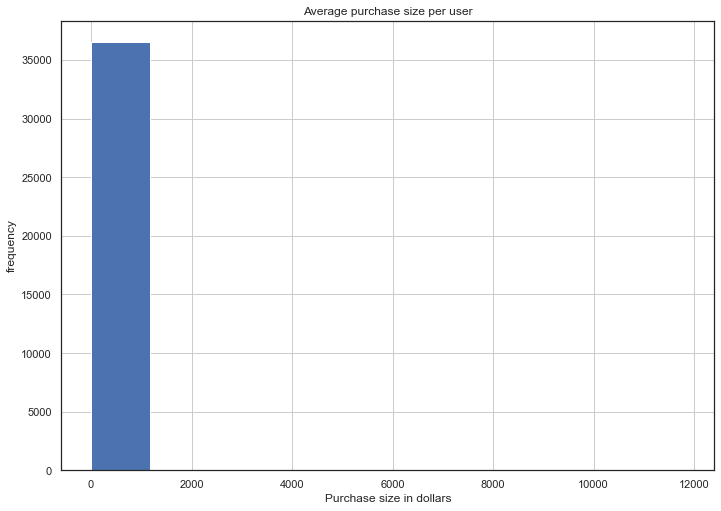

In [95]:

# hist of avg check per user:
avg_check['rev_p_user'].hist()
plt.xlabel('Purchase size in dollars')
plt.ylabel('frequency')
plt.title('Average purchase size per user')
plt.show();


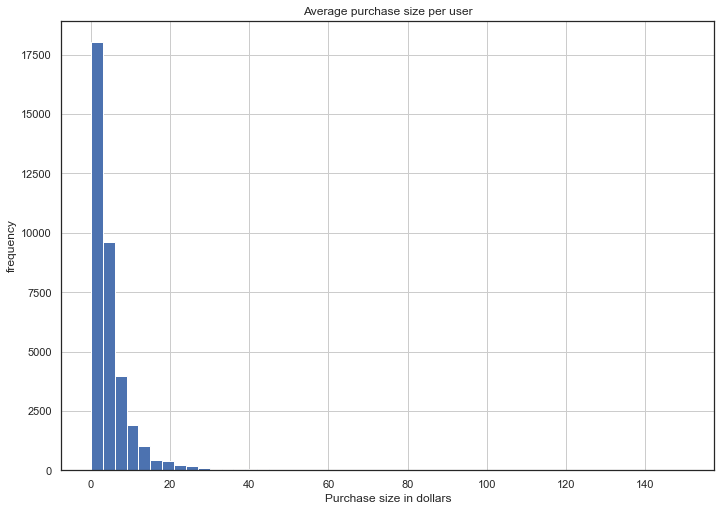

In [171]:
# narrowing range:
avg_check['rev_p_user'].hist(range=(0, 150), bins=50)
plt.xlabel('Purchase size in dollars')
plt.ylabel('frequency')
plt.title('Average purchase size per user')
plt.show();

In [97]:
print("The average check is:${}".format(avg_check['rev_p_user'].mode().iat[0]))

The average check is:$2.44


In [98]:
# reminder of table..
orders.head(2)

,buy_ts,revenue,uid,o_week,o_month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [99]:
# Cohort analysis on averge check:
avg_cohort = orders.groupby(['first_order_month','o_month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((pd.to_datetime(avg_cohort['o_month']) - pd.to_datetime(avg_cohort['first_order_month'])) / np.timedelta64(1,'M')).round().astype('int')
avg_cohort

,first_order_month,o_month,revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0
1,2017-06-01,2017-07-01,5.547006,1
2,2017-06-01,2017-08-01,5.088161,2
3,2017-06-01,2017-09-01,8.545575,3
4,2017-06-01,2017-10-01,7.084178,4
...,...,...,...,...
74,2018-03-01,2018-05-01,6.334489,2
75,2018-04-01,2018-04-01,4.248774,0
76,2018-04-01,2018-05-01,6.204718,1
77,2018-05-01,2018-05-01,4.286168,0


In [100]:
# creating a pivot table:
avg_cohort_piv=avg_cohort.pivot_table(
    index='first_order_month', 
    columns='age_month', 
    values='revenue', 
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')


age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


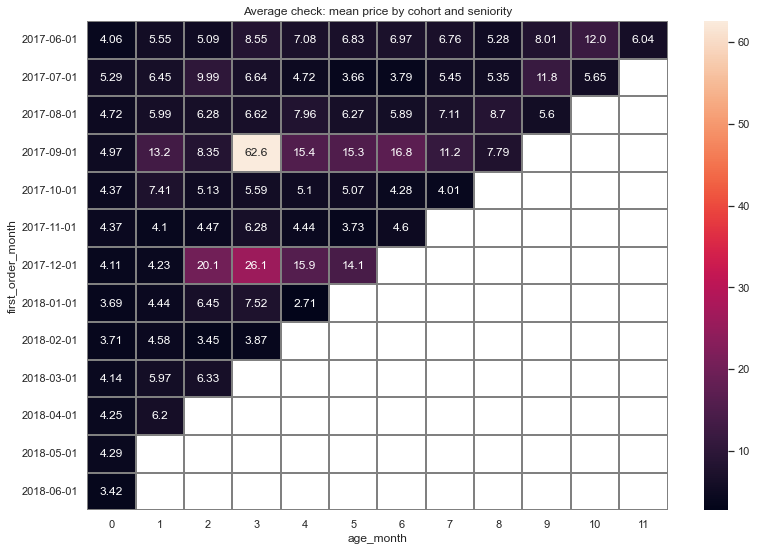

In [101]:
avg_cohort_piv.index = avg_cohort_piv.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Average check: mean price by cohort and seniority')
sns.heatmap(
    avg_cohort_piv, annot=True, linewidths=2, linecolor='gray', fmt='.3', vmax=62.6, vmin=2.71); 

***Summary of average order sizes:***
- Buyers' expenses on the site ranged between 0 and 11810, with the vast majority paying under $100- the median value was $3.05 per user. 
**Looking at expenses by cohorts:**
- In all cohorts, buyers start off with small purchases of 3.42- 5.29 dollars a month on average in the first month of use.
- In general, for most cohorts there is a positive seniority trend- the price paid tends to rise from the first month of use and on, reaching a peak about 2-4 months later, and then slowly lowering expenses.
- Dec 2017 and Sep 2017 seem to be the most profitable cohorts and months.


In [102]:
rev_p_month = avg_cohort.groupby('o_month')['revenue'].mean().reset_index()


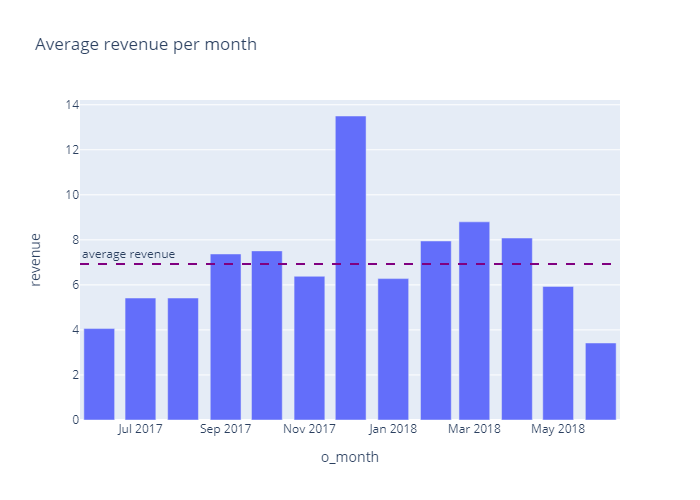

In [103]:
# plotting revenue by month:
fig = px.bar(rev_p_month, x="o_month", y="revenue", title='Average revenue per month')
fig.add_hline(y= rev_p_month['revenue'].mean(),line_dash="dash", line_color="purple", annotation_text="average revenue",
             annotation_position="top left")
fig.show("png");

**As can be seen in this bar chart, the average revenue in December 17' was way beyond the average of the year (almost double). This seems very problematic to me, as if there would be some sort of crisis in December, the company might go broke. (sorry for the pessimism..)**

 ### How much money do they bring? (LTV)

In [104]:
# Make monthly cohorts:
orders.head()


,buy_ts,revenue,uid,o_week,o_month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [105]:
# Get the revenue per cohort for each month
ltv_cohort = orders.groupby(['first_order_month','o_month'])['revenue'].sum().reset_index()
ltv_cohort


,first_order_month,o_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [106]:
# merge with the cohort size
ltv_cohort = ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age']= ((pd.to_datetime(ltv_cohort['o_month']) - pd.to_datetime(ltv_cohort['first_order_month'])) / np.timedelta64(1,'M')).round().astype('int')
ltv_cohort['ltv'] = ltv_cohort['revenue'] / ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,o_month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [107]:
ltv_cohort_piv = ltv_cohort.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum').cumsum(axis=1).round(2)
ltv_cohort_piv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


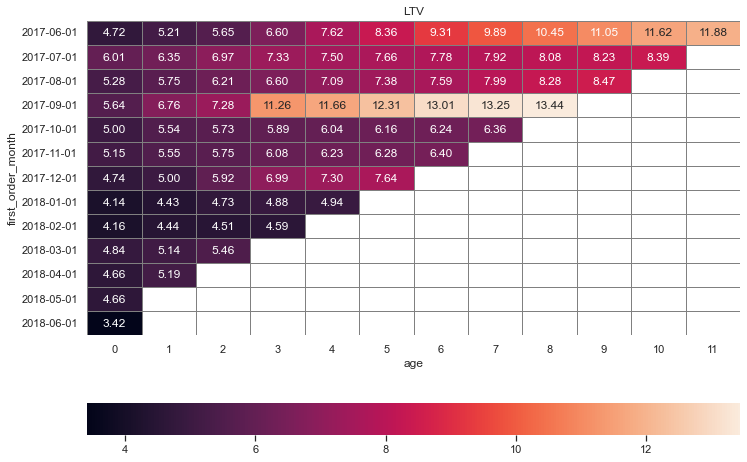

In [108]:
ltv_cohort_piv.index = ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

**Summary - The Life Time Value of customers:**
- On average, each customer from the first cohort brought 11.88 dollars in revenue over their year lifetime.
- Comparing the cohorts on a life time span of 6 months, it seems that the most profitable cohort was the 09/2017 cohort, as it has the best cumulative LTV (12.31 dollars).
- This cohort (09/2017) is also the fastest growing cohort, with the greatest leap observed on Dec2017 (age=3 months).


### 2.3. Marketing - 

###  How much money was spent? Overall/per source/over time

In [109]:
costs.head()

,source_id,dt,costs,c_week,c_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [110]:
# Overall money spent:
print("The overall money spent was {} dollars".format(costs['costs'].sum()))

The overall money spent was 329131.62 dollars


In [111]:
# Money spent per source:
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


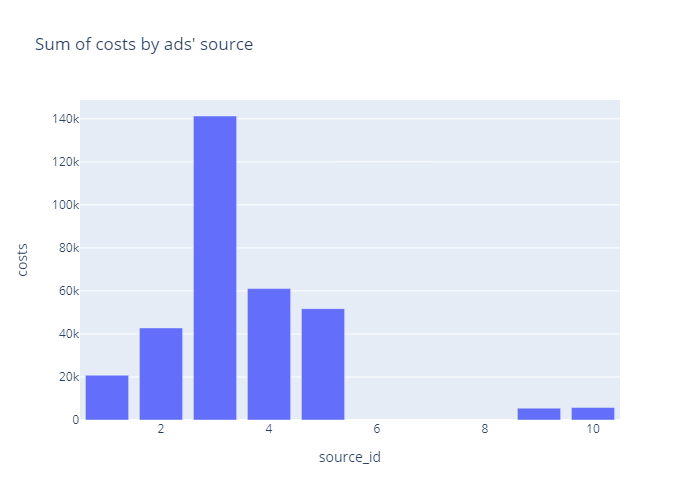

In [112]:

fig = px.bar(costs_per_source, x="source_id", y="costs", title="Sum of costs by ads' source")
fig.show("png");

**Hist shows that money was spent on 7 types of ads, with the largest amount spent on source_id=3 (141321 dollars).
The smallest amount was spent on source_id=9: 5517 dollars**


In [113]:
costs_ = costs[['source_id', 'costs', 'c_month']]

In [114]:
costs_p_m = costs_.groupby(['c_month'])['costs'].sum().reset_index()
costs_p_m.columns= ['c_month', 'sum_of_marketing_cost']
costs_p_m

,c_month,sum_of_marketing_cost
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


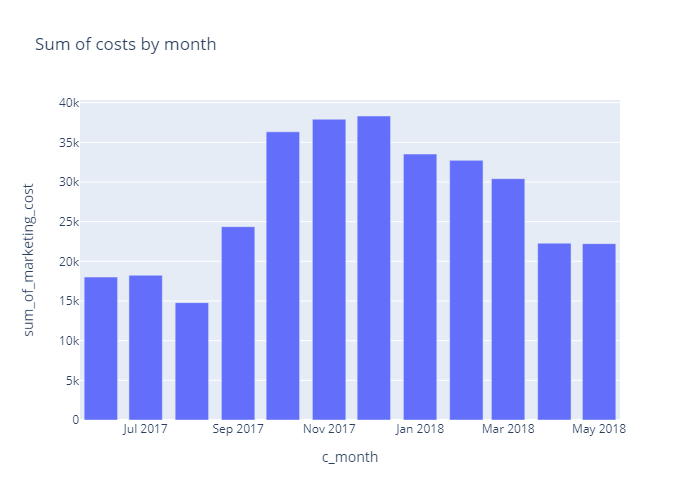

In [115]:
fig = px.bar(costs_p_m, x="c_month", y="sum_of_marketing_cost", title="Sum of costs by month")
fig.show("png");

In [116]:
costs_grouped = costs_.groupby(['c_month', 'source_id'])['costs'].sum().reset_index()
costs_grouped

,c_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


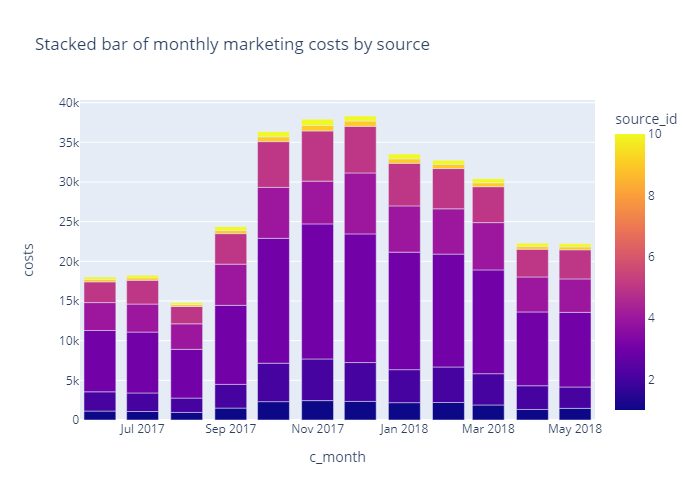

In [117]:
# stacked bar of monthly marketing costs by source:

fig = px.bar(costs_grouped, x="c_month", y="costs", color="source_id", title= "Stacked bar of monthly marketing costs by source")

fig.show("png");

In [118]:
# Money spent over time: 
costs_per_month = costs.groupby(['c_month'])['costs'].sum().reset_index()
costs_per_month

,c_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [119]:
rev_p_month = orders.groupby(['o_month'])['revenue'].sum().reset_index()
rev_p_month

,o_month,revenue
0,2017-06-01,9557.49
1,2017-07-01,12539.47
2,2017-08-01,8758.78
3,2017-09-01,18345.51
4,2017-10-01,27987.70
5,2017-11-01,27069.93
6,2017-12-01,36388.60
7,2018-01-01,19417.13
8,2018-02-01,25560.54
9,2018-03-01,28834.59


In [120]:
mau = mau.sort_values(by='v_month')
mau

,v_month,uid
1,2017-06-01,13259
2,2017-07-01,14183
0,2017-08-01,11631
3,2017-09-01,18975
9,2017-10-01,29692
11,2017-11-01,32797
10,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
6,2018-03-01,27473


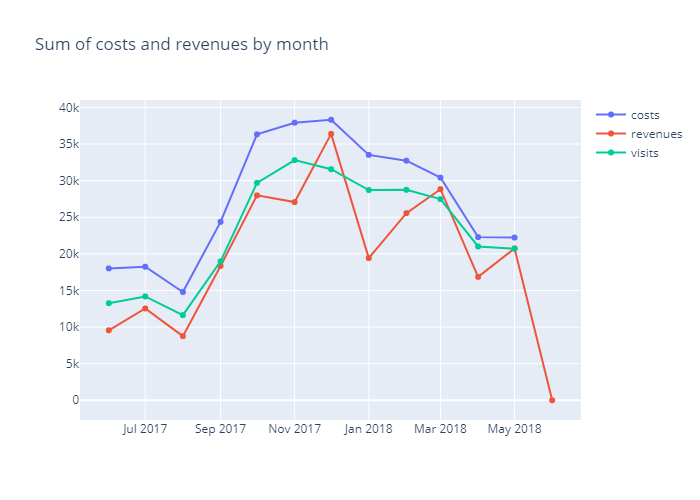

In [121]:
fig = go.Figure()
fig = px.line(title="Sum of costs and revenues by month")
fig.add_trace(go.Scatter(
    x= costs_per_month['c_month'],
    y=costs_per_month['costs'],
    name="costs"
))

fig.add_trace(go.Scatter(
    x=rev_p_month['o_month'],
    y=rev_p_month['revenue'],
    name="revenues"
))

fig.add_trace(go.Scatter(
    x=mau['v_month'],
    y=mau['uid'],
    name="visits"
))

fig.show("png");

**Line plot shows how marketing costs change from month to month throughout the year (blue line).** 
- December2017 shows the highest expense on marketing, probably due to the holidays. This expense might explain the high revenue found (red line), and also goes with a relatively high mau (green line). It is not clear what happend in Jan 18, and why there was a drop in revenue.
- The lowest expense is found in August 2017, which is an unexpected decrease compared to the two previous months, especially as a new company (i think). Parallel decreases in revenue and mau are shown on that month, possibly as a result of it.
- Looking at the general shape of both lines we can see that the cost of marketing per month is always higher than the revenue of that month (maybe the comparison should be to the revenue of the next month?..).
- From October 2017 and on, there is no clear pattern showing that higher investment in marketing yields higher revenue and vice versa. Also, there is no correlation with the number of visits per month (green line).
- Yet, it seems that higher marketing costs promote higher monthly active users.

### How much was the customer acquisition cost for each of the sources?

#### Calculating CAC by month:

In [122]:
# extracting the number of buyers from orders table:
buyers= orders.groupby(['o_month'])['uid'].nunique().reset_index()
buyers.columns=['month', 'monthly_buyers']
buyers

,month,monthly_buyers
0,2017-06-01,2023
1,2017-07-01,1984
2,2017-08-01,1472
3,2017-09-01,2750
4,2017-10-01,4675
5,2017-11-01,4547
6,2017-12-01,4942
7,2018-01-01,3898
8,2018-02-01,4258
9,2018-03-01,4181


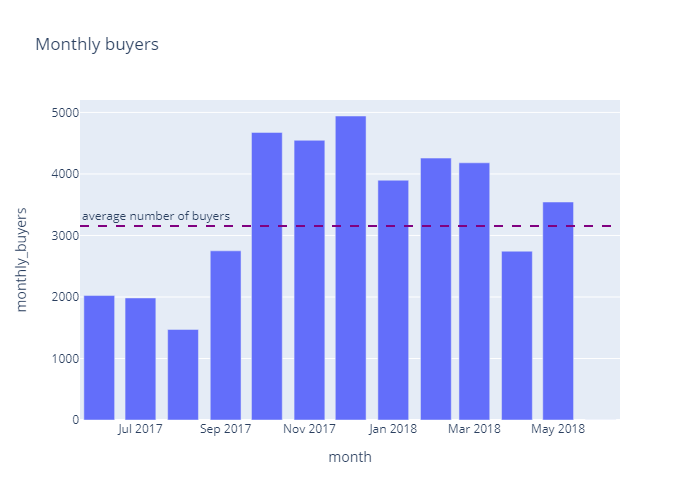

In [123]:
fig = px.bar(buyers, x="month", y="monthly_buyers", title='Monthly buyers')
fig.add_hline(y= buyers['monthly_buyers'].mean(),line_dash="dash", line_color="purple", annotation_text="average number of buyers",
             annotation_position="top left")
fig.show("png");

The months with the highest rate of monthly buyers were Oct-Dec, the highest being December.
The lowest selling month was August.

In [124]:
# extracting monthly costs from costs table:
m_costs = costs.groupby(['c_month'])['costs'].sum().reset_index()
m_costs.columns=['month', 'monthly_costs']

m_costs

,month,monthly_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


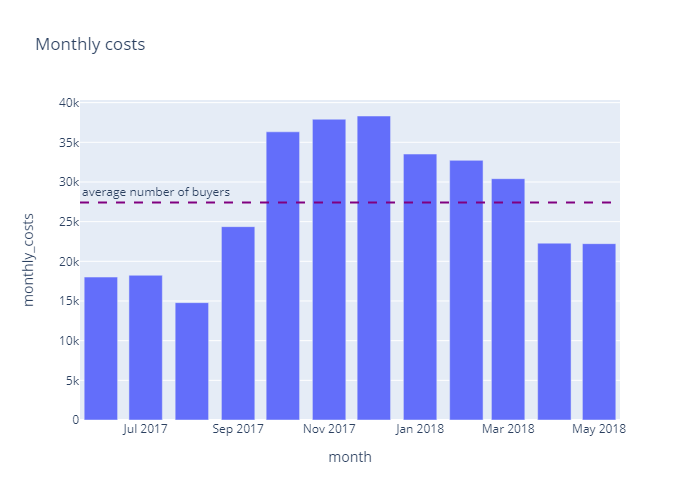

In [125]:
fig = px.bar(m_costs, x="month", y="monthly_costs", title='Monthly costs')
fig.add_hline(y= m_costs['monthly_costs'].mean(),line_dash="dash", line_color="purple", annotation_text="average number of buyers",
             annotation_position="top left")
fig.show("png");

The marketing cost expenses were highest during Oct to Dec, the highest being in December. The lowest expenses were in August. these results are similar to the ones found when analyzing the number of buyers per month.

In [126]:
# merging the two:
CAC_per_month = m_costs.merge(buyers,how='left',on=['month'])
CAC_per_month['CAC'] = CAC_per_month['monthly_costs'] / CAC_per_month['monthly_buyers']
CAC_per_month

,month,monthly_costs,monthly_buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600
5,2017-11-01,37907.88,4547,8.336899
6,2017-12-01,38315.35,4942,7.753005
7,2018-01-01,33518.52,3898,8.598902
8,2018-02-01,32723.03,4258,7.685070
9,2018-03-01,30415.27,4181,7.274640


In [127]:
print("The average customer acquisition cost is {} dollars".format(round(CAC_per_month['CAC'].mean(), 2)))


The average customer acquisition cost is 8.24 dollars


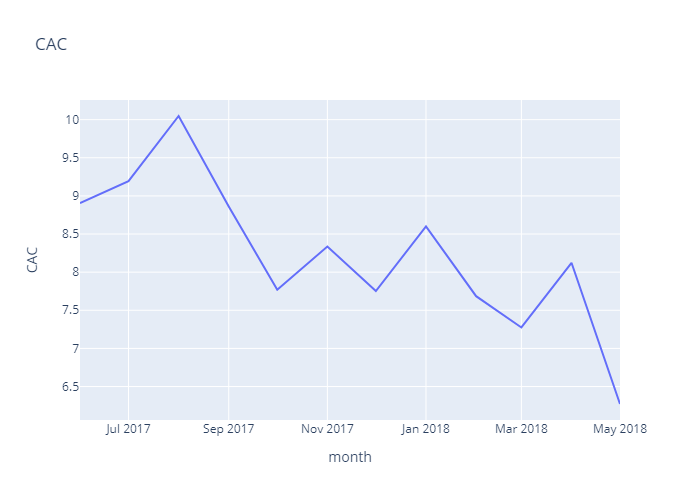

In [128]:
fig = px.line(CAC_per_month, x="month", y="CAC", title='CAC')
fig.show("png");

***Plot summary***- 
- AS can be seen, the CAC's general trend is a negative one: customer acquisition cost decreases through out the year.
- However, it is not a smooth straight line, but rather a fluctuating one, in which in one month the CAC is high and in the next it is low.

#### Calculating CAC per source:

In [129]:
# looking into the ad sources from which the users came from:
visits.groupby(['uid'])['source_id'].nunique()

uid
11863502262781          1
49537067089222          1
297729379853735         1
313578113262317         1
325320750514679         1
                       ..
18446403737806311543    1
18446424184725333426    1
18446556406699109058    1
18446621818809592527    1
18446676030785672386    1
Name: source_id, Length: 228169, dtype: int64

In [130]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month,session_duration_sec,first_session,cohort,cohort_age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19,2018-02-01,0


In [131]:
# in case some users have a few sources connected to them:
first_source = visits.sort_values('start_ts').groupby('uid').first()['source_id'].reset_index()
first_source.columns = ['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [132]:
# quick check (-same source in this case, but indeed some users visit more than once..):
visits[visits['uid'] == 313578113262317]

,device,end_ts,source_id,start_ts,uid,v_day,v_week,v_month,session_duration_sec,first_session,cohort,cohort_age
193721,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018-03-11,2018-03-08,2018-03-01,360,2017-09-18,2017-09-01,6
193722,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-18,2017-09-14,2017-09-01,1080,2017-09-18,2017-09-01,0
193723,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,2018-02-15,2018-02-01,540,2017-09-18,2017-09-01,5


In [133]:
# merging with orders to have data on revenue
orders = orders.merge(first_source, on=['uid'], how='left')
orders.head()

,buy_ts,revenue,uid,o_week,o_month,first_order,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3


In [134]:
# how many buyers were there for each source, by month?
buyers_p_month_source = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_p_month_source.columns = ['month','source','buyers']
buyers_p_month_source.head()

,month,source,buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [135]:
# looking at total marketing costs by month and source:
marketing_by_month_source = costs.groupby(['c_month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.columns = ['month', 'source', 'costs']
marketing_by_month_source

,month,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [136]:
costs.head(2)

,source_id,dt,costs,c_week,c_month
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01


In [137]:
#checking dtypes before merging:
buyers_p_month_source.dtypes

month     datetime64[ns]
source             int64
buyers             int64
dtype: object

In [138]:
marketing_by_month_source.dtypes

month      object
source      int64
costs     float64
dtype: object

In [139]:
# changing month(object) to month (datetime):
marketing_by_month_source['month'] = pd.to_datetime(marketing_by_month_source['month'])
marketing_by_month_source.dtypes

month     datetime64[ns]
source             int64
costs            float64
dtype: object

In [140]:
# merging dfs and calculating CAC
CAC_per_month_source = marketing_by_month_source.merge(buyers_p_month_source, on= ['month', 'source'], how = 'left')
CAC_per_month_source['CAC'] = CAC_per_month_source['costs'] / CAC_per_month_source['buyers']
CAC_per_month_source

,month,source,costs,buyers,CAC
0,2017-06-01,1,1125.61,190,5.924263
1,2017-06-01,2,2427.38,235,10.329277
2,2017-06-01,3,7731.65,638,12.118574
3,2017-06-01,4,3514.80,413,8.510412
4,2017-06-01,5,2616.12,384,6.812812
...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,11.150972
80,2018-05-01,4,4214.21,804,5.241555
81,2018-05-01,5,3669.56,497,7.383421
82,2018-05-01,9,362.17,60,6.036167


In [141]:
# Average CAC per source
CAC_per_month_source.groupby('source')['CAC'].mean()

source
1      7.212107
2     12.504068
3     13.802743
4      6.439374
5      7.451938
9      5.413892
10     4.867125
Name: CAC, dtype: float64

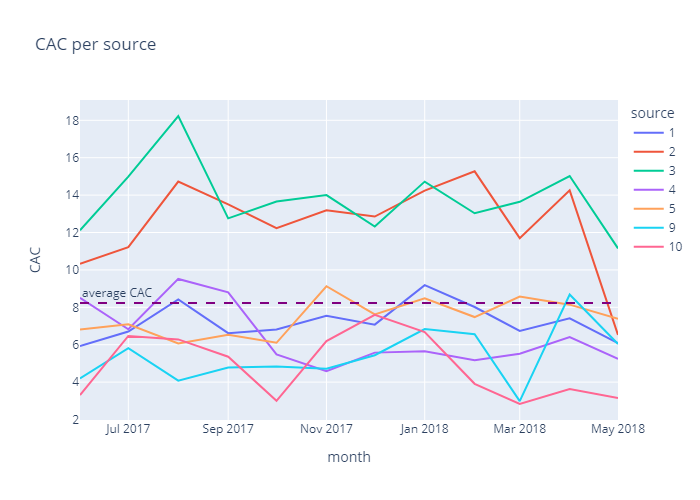

In [142]:
#plotting CAC dynamics, compared to general average CAC
fig = px.line(CAC_per_month_source, x="month", y="CAC", color='source', title='CAC per source')
fig.add_hline(y= CAC_per_month['CAC'].mean(),line_dash="dash", line_color="purple", annotation_text="average CAC",
             annotation_position="top left")
fig.show("png");

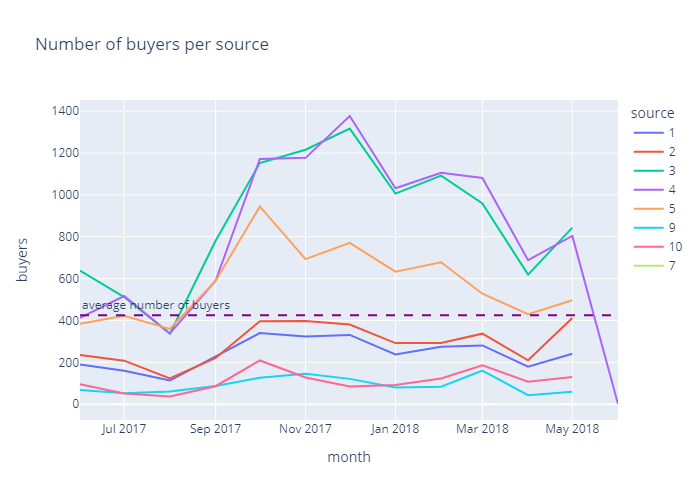

In [143]:
# number of buyers by source
fig = px.line(buyers_p_month_source, x="month", y="buyers", color='source', title='Number of buyers per source')
fig.add_hline(y= buyers_p_month_source['buyers'].mean(), line_dash="dash", line_color="purple", annotation_text="average number of buyers",
             annotation_position="top left")
fig.show("png");

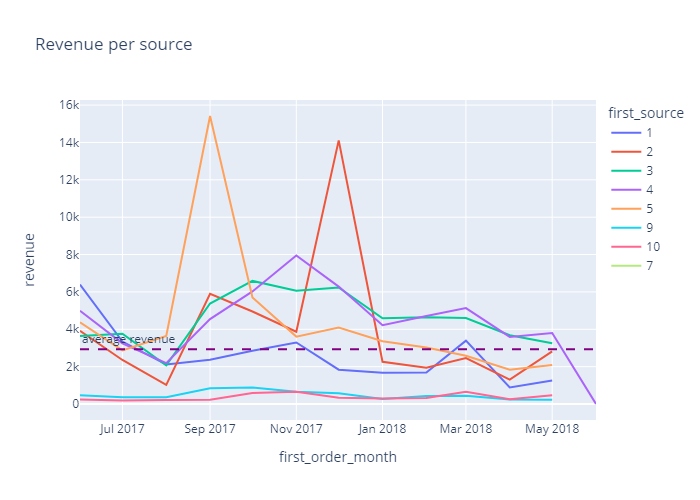

In [144]:
# revenue per source:
revenue_per_source = orders.groupby(['first_order_month','first_source'])['revenue'].sum().reset_index()
fig = px.line(revenue_per_source, x="first_order_month", y="revenue", color='first_source', title='Revenue per source')
fig.add_hline(y= revenue_per_source['revenue'].mean(),line_dash="dash", line_color="purple", annotation_text="average revenue",
             annotation_position="top left")
fig.show("png");

***Summary CAC results:***
The cost of acquiring new customers is very different each month and for each ad-source:
- Sources 2 and 3 seem to require (way) larger than average investments in order to acquire new buyers, especially during August 2017. We should check if it was worth it.
- Looking at August, it seems that investment in source 3 did yield larger numbers of buyers compared to the other sources, as well as somewhat high revenue compared to the other sources, but it is not clear yet if it was worth it.
- Source 5 and source 2 were profitable, yielding peak revenues in September (5) and December (2), however- for source 2 the CAC was very high as well.
- Source 5, however, required only average investments (CAC) to reach high numbers of buyers and peak sales.
- Source 4 also looks interesting, with mostly below average CACs, but yielding very high numbers of buyers (like source 3, only without investing much) and also above average revenues.



### How worthwhile were the investments? (ROI)
 ROI = LTV / CAC

In [145]:
CAC_per_month

,month,monthly_costs,monthly_buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1984,9.193846
2,2017-08-01,14790.54,1472,10.047921
3,2017-09-01,24368.91,2750,8.861422
4,2017-10-01,36322.88,4675,7.769600
5,2017-11-01,37907.88,4547,8.336899
6,2017-12-01,38315.35,4942,7.753005
7,2018-01-01,33518.52,3898,8.598902
8,2018-02-01,32723.03,4258,7.685070
9,2018-03-01,30415.27,4181,7.274640


In [146]:
#checking dtypes before merging:
CAC_per_month.dtypes

month              object
monthly_costs     float64
monthly_buyers      int64
CAC               float64
dtype: object

In [147]:
CAC_per_month['month'] = pd.to_datetime(CAC_per_month['month'])
CAC_per_month_ROI = CAC_per_month[['month','CAC']]
CAC_per_month_ROI.columns = ['first_order_month','CAC']
CAC_per_month_ROI

,first_order_month,CAC
0,2017-06-01,8.905091
1,2017-07-01,9.193846
2,2017-08-01,10.047921
3,2017-09-01,8.861422
4,2017-10-01,7.769600
5,2017-11-01,8.336899
6,2017-12-01,7.753005
7,2018-01-01,8.598902
8,2018-02-01,7.685070
9,2018-03-01,7.274640


In [148]:
ltv_cohort.head()

,first_order_month,o_month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


In [149]:
# merging the two dfs:
ROI = ltv_cohort.merge(CAC_per_month_ROI, on=['first_order_month'], how='left')
ROI

,first_order_month,o_month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,8.905091
...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,7.274640
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,8.122952
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,8.122952
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562,6.270957


In [150]:
# calculating return of investment:
ROI['ROI'] = ROI['ltv'] / ROI['CAC']
ROI

,first_order_month,o_month,revenue,cohort_size,age,ltv,CAC,ROI
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,8.905091,0.054500
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,8.905091,0.049145
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,8.905091,0.107205
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,8.905091,0.114825
...,...,...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,7.274640,0.043378
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,8.122952,0.573387
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,8.122952,0.065444
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562,6.270957,0.743198


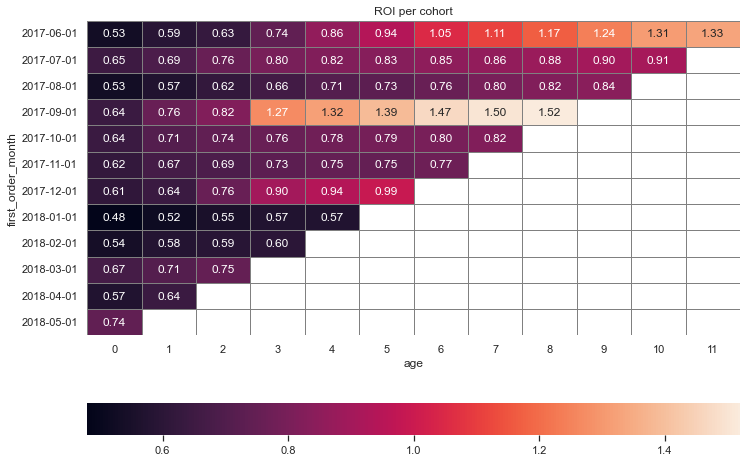

In [151]:
# creating a pivot table and heatmap:
roi_piv = ROI.pivot_table(index='first_order_month', columns='age', values='ROI', aggfunc='mean').cumsum(axis=1).round(2) 

roi_piv.index = roi_piv.index.astype(str)
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

***ROI heatmap*** 
- The heatmap of ROI looks a lot like the one of LTV, which might mean that the CAC didn't change much between cohorts and months.
- The return on investment is mostly lower than 1, which means the CAC was high and exceeded the LTV. ROI=0.5, for example, means that the cost of acquiring a buyer was twice as large as the life time value of the buyer.
- The two cohorts in which ROI is positive are June 17' and September 17', with December 17' approaching positive (ROI- 0.99).


#### ROI per source:

In [152]:
# calculating ltv per source:
ltv_per_source = orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source','buyers','revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue'] / ltv_per_source['buyers']
ltv_per_source

C:\Users\USER\AppData\Local\Temp/ipykernel_10380/70713679.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,source,buyers,revenue,ltv
0,1,2899,31090.55,10.724577
1,2,3506,46923.61,13.383802
2,3,10473,54511.24,5.204931
3,4,10296,56696.83,5.506685
4,5,6931,52624.02,7.592558
5,7,1,1.22,1.220000
6,9,1088,5759.40,5.293566
7,10,1329,4450.33,3.348631


In [153]:
costs_per_source.columns = ['source', 'marketing_costs']
costs_per_source

,source,marketing_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [154]:
# merging with marketing_per_source:
roi_per_source = costs_per_source.merge(ltv_per_source, on=['source'])
roi_per_source

,source,marketing_costs,buyers,revenue,ltv
0,1,20833.27,2899,31090.55,10.724577
1,2,42806.04,3506,46923.61,13.383802
2,3,141321.63,10473,54511.24,5.204931
3,4,61073.60,10296,56696.83,5.506685
4,5,51757.10,6931,52624.02,7.592558
5,9,5517.49,1088,5759.40,5.293566
6,10,5822.49,1329,4450.33,3.348631


In [155]:
# creating CAC and ROMI (return of marketing investment):
roi_per_source['cac'] = roi_per_source['marketing_costs'] / roi_per_source['buyers']
roi_per_source['romi'] = roi_per_source['ltv'] / roi_per_source['cac']
roi_per_source

,source,marketing_costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,2899,31090.55,10.724577,7.186364,1.492351
1,2,42806.04,3506,46923.61,13.383802,12.209367,1.096191
2,3,141321.63,10473,54511.24,5.204931,13.493901,0.385725
3,4,61073.60,10296,56696.83,5.506685,5.931779,0.928336
4,5,51757.10,6931,52624.02,7.592558,7.467479,1.016750
5,9,5517.49,1088,5759.40,5.293566,5.071222,1.043844
6,10,5822.49,1329,4450.33,3.348631,4.381106,0.764335


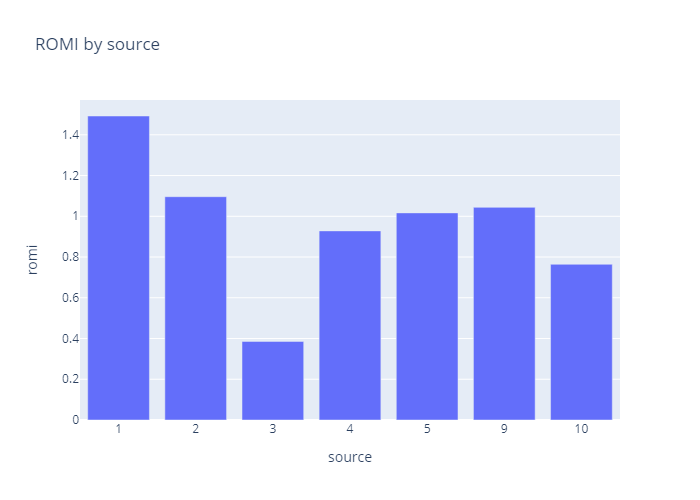

In [156]:
fig = px.bar(roi_per_source, x='source', y='romi', title="ROMI by source")
fig.update_xaxes(type='category')
fig.show("png");

***ROMI bar chart***
- (Surprisingly!) Source 1 got the highest return of marketing investment rates, and source 3- the lowest. (these results do not match my previous observations based on merely looking at the line plots, and teach me not to look only at the high peaks and draw conclusions, as the seemingly lower underdog might end up winning it all :-))
- The sources that seem to be worth the investment are (by order): 1, 2, 9, 5.
- Sources 3, 10 and 4 yield very low revenues per buyer and might not be worth investing in.


In [157]:
# dataset for source==1:
new_orders=orders[orders.first_source == 1]

In [158]:
# create cohorts by lifetime and sum revenue:
cohort_ltv = new_orders.groupby(['first_order_month','o_month'])['revenue'].sum().reset_index()
cohort_ltv.rename(columns={'revenue': 'total_revenue'})


,first_order_month,o_month,total_revenue
0,2017-06-01,2017-06-01,1378.70
1,2017-06-01,2017-07-01,414.98
2,2017-06-01,2017-08-01,419.43
3,2017-06-01,2017-09-01,714.24
4,2017-06-01,2017-10-01,811.20
...,...,...,...
73,2018-03-01,2018-04-01,544.81
74,2018-03-01,2018-05-01,221.64
75,2018-04-01,2018-04-01,842.12
76,2018-04-01,2018-05-01,48.24


In [159]:
# define number of buyers (cohort size):
coho_size = new_orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
coho_size.columns=['first_order_month','cohort_size']
coho_size

,first_order_month,cohort_size
0,2017-06-01,190
1,2017-07-01,160
2,2017-08-01,113
3,2017-09-01,227
4,2017-10-01,340
5,2017-11-01,324
6,2017-12-01,331
7,2018-01-01,238
8,2018-02-01,275
9,2018-03-01,281


In [160]:
# merge 2 datasets to calculate age:
cohort_ltv = cohort_ltv.merge(coho_size, on=['first_order_month'])
cohort_ltv ['cohort_age']= ((pd.to_datetime(cohort_ltv ['o_month']) - pd.to_datetime(cohort_ltv ['first_order_month'])) / np.timedelta64(1,'M')).round().astype('int')
cohort_ltv ['ltv'] = cohort_ltv ['revenue'] / cohort_ltv ['cohort_size']
cohort_ltv

,first_order_month,o_month,revenue,cohort_size,cohort_age,ltv
0,2017-06-01,2017-06-01,1378.70,190,0,7.256316
1,2017-06-01,2017-07-01,414.98,190,1,2.184105
2,2017-06-01,2017-08-01,419.43,190,2,2.207526
3,2017-06-01,2017-09-01,714.24,190,3,3.759158
4,2017-06-01,2017-10-01,811.20,190,4,4.269474
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,544.81,281,1,1.938826
74,2018-03-01,2018-05-01,221.64,281,2,0.788754
75,2018-04-01,2018-04-01,842.12,179,0,4.704581
76,2018-04-01,2018-05-01,48.24,179,1,0.269497


In [161]:
# towards calculating CAC:
# extracting the number of buyers from orders table:
bought = new_orders.groupby(['o_month'])['uid'].nunique().reset_index()
bought.columns=['month', 'monthly_buyers']


In [162]:
# extracting monthly costs per source:
new_costs = costs[costs.source_id ==1]
mon_costs = new_costs.groupby(['c_month'])['costs'].sum().reset_index()
mon_costs.columns=['month', 'monthly_costs']


In [163]:
# merging the two:
CAC_p_mon = mon_costs.merge(bought,how='left',on=['month'])
CAC_p_mon['CAC'] = CAC_p_mon['monthly_costs'] / CAC_p_mon['monthly_buyers']
CAC_p_mon


,month,monthly_costs,monthly_buyers,CAC
0,2017-06-01,1125.61,190,5.924263
1,2017-07-01,1072.88,176,6.095909
2,2017-08-01,951.81,128,7.436016
3,2017-09-01,1502.01,255,5.890235
4,2017-10-01,2315.75,376,6.158910
5,2017-11-01,2445.16,383,6.384230
6,2017-12-01,2341.20,388,6.034021
7,2018-01-01,2186.18,293,7.461365
8,2018-02-01,2204.48,330,6.680242
9,2018-03-01,1893.09,351,5.393419


In [164]:
# towards a ROI measure:
CAC_p_mon['month'] = pd.to_datetime(CAC_p_mon['month'])
CAC_p_mon_ROI = CAC_p_mon[['month','CAC']]
CAC_p_mon_ROI.columns = ['first_order_month','CAC']



In [165]:
# merging the two dfs:
roi = cohort_ltv.merge(CAC_p_mon_ROI, on=['first_order_month'], how='left')

# calculating return of investment:
roi['ROI'] = roi['ltv'] / roi['CAC']
roi


,first_order_month,o_month,revenue,cohort_size,cohort_age,ltv,CAC,ROI
0,2017-06-01,2017-06-01,1378.70,190,0,7.256316,5.924263,1.224847
1,2017-06-01,2017-07-01,414.98,190,1,2.184105,5.924263,0.368671
2,2017-06-01,2017-08-01,419.43,190,2,2.207526,5.924263,0.372625
3,2017-06-01,2017-09-01,714.24,190,3,3.759158,5.924263,0.634536
4,2017-06-01,2017-10-01,811.20,190,4,4.269474,5.924263,0.720676
...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,544.81,281,1,1.938826,5.393419,0.359480
74,2018-03-01,2018-05-01,221.64,281,2,0.788754,5.393419,0.146244
75,2018-04-01,2018-04-01,842.12,179,0,4.704581,5.822325,0.808025
76,2018-04-01,2018-05-01,48.24,179,1,0.269497,5.822325,0.046287


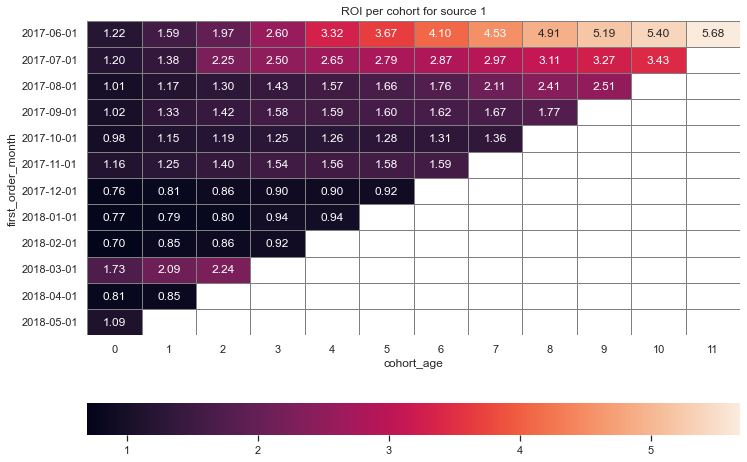

In [166]:
# creating a pivot table and heatmap:
roi_pivot = roi.pivot_table(index='first_order_month', columns='cohort_age', values='ROI', aggfunc='mean').cumsum(axis=1).round(2) 

roi_pivot.index = roi_pivot.index.astype(str)
sns.heatmap(roi_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort for source 1')
plt.show()


In [167]:
def roi_per_source(source):
    new_orders = orders[orders.first_source == source]
    print("ROI heatmap for source", source)
    print()
    # calculating ltv per source:
    cohort_ltv = new_orders.groupby(['first_order_month','o_month'])['revenue'].sum().reset_index()
    cohort_ltv.rename(columns={'revenue': 'total_revenue'})
    coho_size = new_orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
    coho_size.columns=['first_order_month','cohort_size']
    cohort_ltv = cohort_ltv.merge(coho_size, on=['first_order_month'])
    cohort_ltv ['cohort_age']= ((pd.to_datetime(cohort_ltv['o_month']) - pd.to_datetime(cohort_ltv ['first_order_month'])) / np.timedelta64(1,'M')).round().astype('int')
    cohort_ltv ['ltv'] = cohort_ltv ['revenue'] / cohort_ltv['cohort_size']
    # calculating CAC per source:
    bought = new_orders.groupby(['o_month'])['uid'].nunique().reset_index()
    bought.columns=['month', 'monthly_buyers']
    new_costs = costs[costs.source_id == source]
    mon_costs = new_costs.groupby(['c_month'])['costs'].sum().reset_index()
    mon_costs.columns=['month', 'monthly_costs']
    CAC_p_mon = mon_costs.merge(bought,how='left',on=['month'])
    CAC_p_mon['CAC'] = CAC_p_mon['monthly_costs'] / CAC_p_mon['monthly_buyers']
   # calculating ROI:
    CAC_p_mon['month'] = pd.to_datetime(CAC_p_mon['month'])
    CAC_p_mon_ROI = CAC_p_mon[['month','CAC']]
    CAC_p_mon_ROI.columns = ['first_order_month','CAC'] 
    roi = cohort_ltv.merge(CAC_p_mon_ROI, on=['first_order_month'], how='left')
    roi['ROI'] = roi['ltv'] / roi['CAC']
    roi
    # creating a pivot table and heatmap:
    roi_pivot = roi.pivot_table(index='first_order_month', columns='cohort_age', values='ROI', aggfunc='mean').cumsum(axis=1).round(2) 
    roi_pivot.index = roi_pivot.index.astype(str)        
    sns.heatmap(roi_pivot, annot=True, fmt='.2f', linewidths=1, vmin=0.3, vmax=5.70, linecolor='grey', cbar_kws= {'orientation': 'horizontal'})
    plt.show()
   

ROI heatmap for source 1



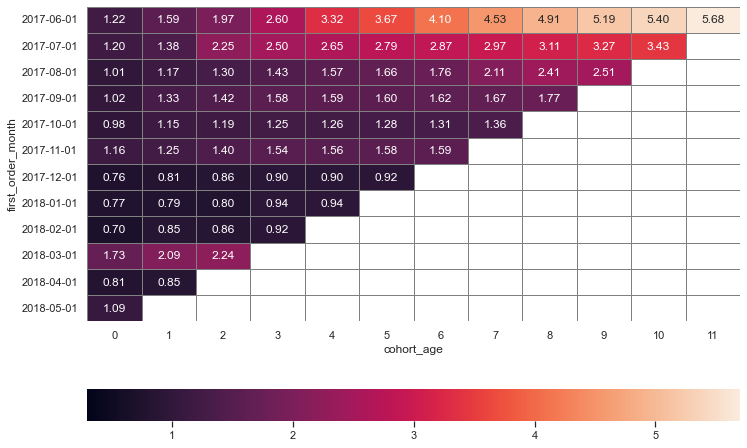

ROI heatmap for source 2



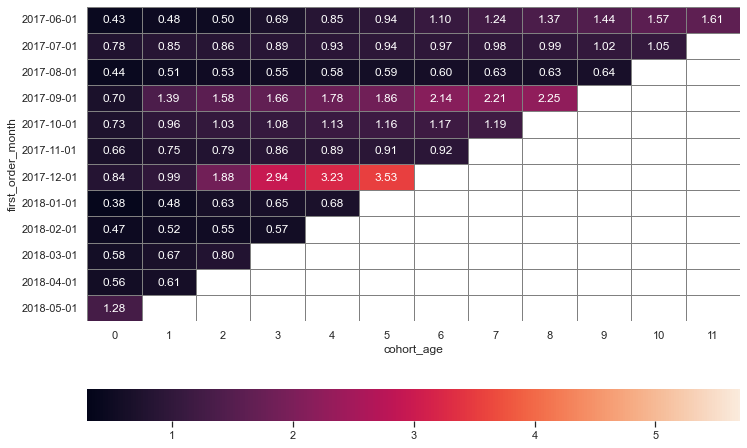

ROI heatmap for source 3



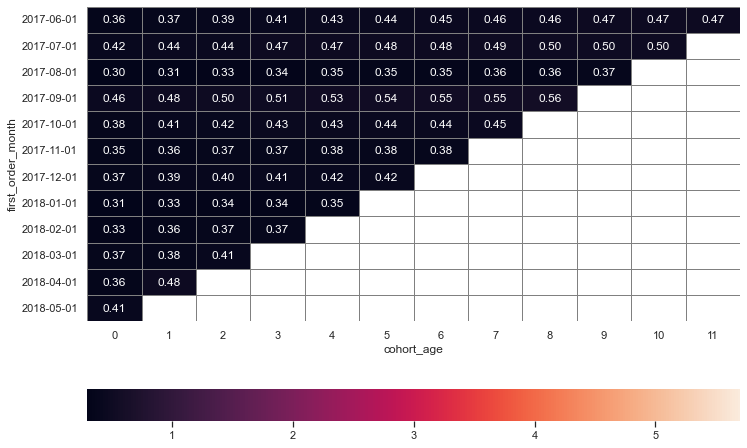

ROI heatmap for source 4



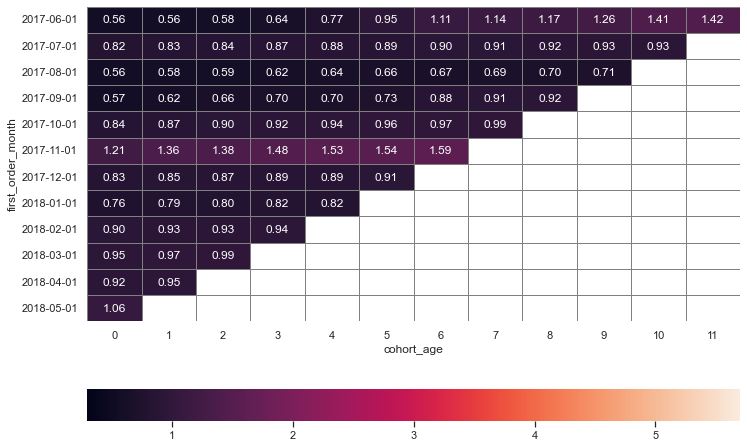

ROI heatmap for source 5



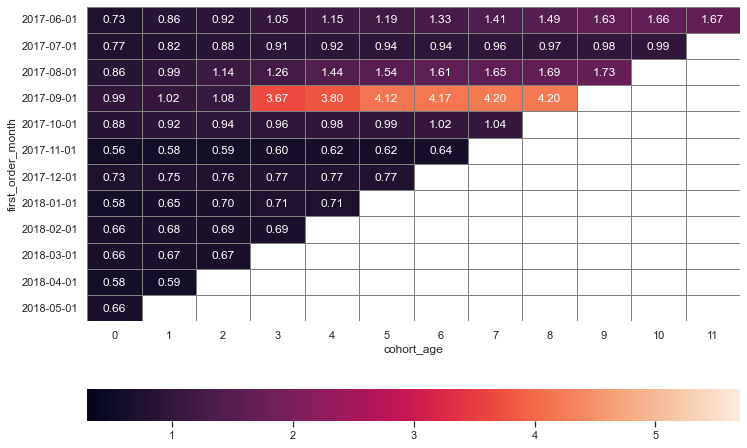

ROI heatmap for source 9



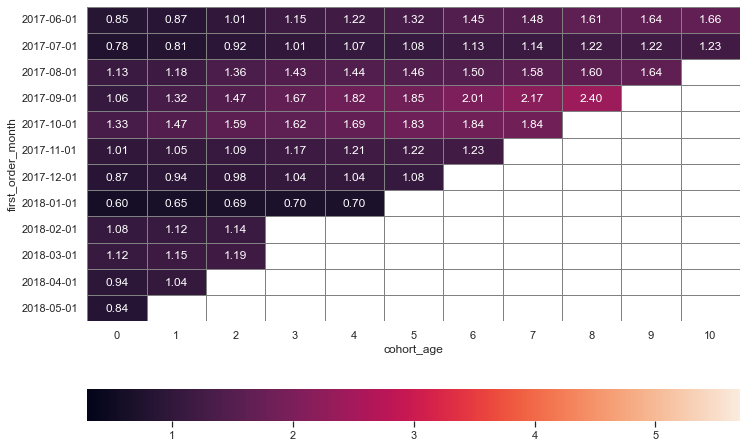

ROI heatmap for source 10



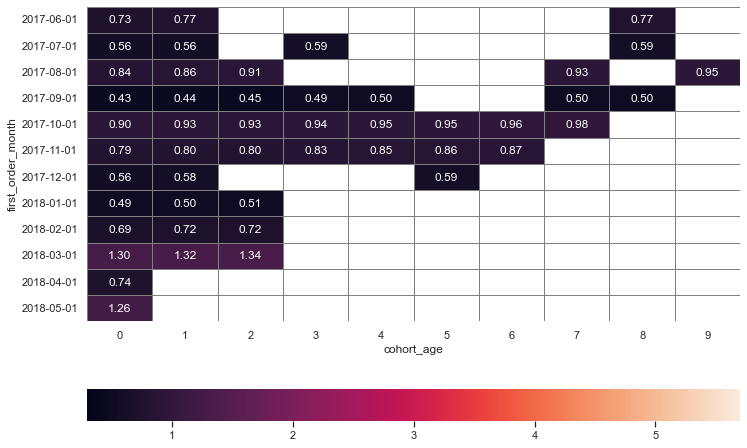

In [168]:
sources = [1, 2, 3, 4, 5, 9, 10]
for source in sources:
    roi_per_source (source)


**ROI per source- Summary:**
- **Source 1:** Seems profitable- 8 cohorts had a positive return of investment (ltv > cac). Dec to Feb and also April were not profitable cohorts. The most profitable cohort was June, in which the cumulative roi was 5.68 (ltv was 5.68 times larger than the cac). This was the highest roi value of all sources.
- **Sorce 2:** Also seems profitable: 6 cohorts had a positive ROI at the end of their lifetime. Dec and Sep were the most profitable cohorts, with ROI values of 3.53 and 2.25, respectively.
- **Source 3:** - didn't seem profitable. All cohorts had lower than 1 ROI values.
- **Source 4:** - Also, not so profitable: 3 cohorts had positive ROIs, but with relatively low values.
- **Source 5:** - general profitability is hard to discern from the heatmap- there are only 4 profitable cohorts, however- the Sep cohort seems highly profitable, especially during Christmas (December).
- **Source 9:** - A profitable source, with 10 profitable cohorts.
- **Source 10:** Not a profitable source. Almost every cohort has missing active months, maybe indicating a churn problem (?)


## Step 3. Conclusions: 
advise marketing experts how much money to invest and where.
What sources/platforms would you recommend? Back up your choice: what
metrics did you focus on? Why? What conclusions did you draw after finding
the metric values?


Yandex.Afisha is a website designed to allow its users to search showtimes of plays and films all over Russia, check availability and pre-purchase tickets online.
As the analytical department at Yandex.Afisha we wished to explore customers' behavior and advise about ways to help optimize marketing expenses.
**More specifically, we wished to look into the following KPI's:**
- User behavior: DAU/WAU/MAU/sticky factor
- Number and duration of site visits
- Retention of users
-  Conversion rate (CR)- from user to buyer
- Number of orders per buyer, and the average order size (average check)
- Life Time Value (LTV) and Customer Acquisition Cost (CAC)
- Return of investment (ROI)
---------------------------------------
**The analyses involved 3 data sets:** 
- 1- visits (359400 rows of data): included data about users' visit dates to the site, source of the ad through which they reached the site, and from which device type did they enter (desktop or touch screens).
- 2- orders (50415 rows of data): included data about users' order dates and revenues. 
- 3- costs (2542 rows of data): included data about marketing expenses: How much was paid to each ad source on different dates.

**Data optimization** included changing variable names and data-types to better suit our analysis needs, as well as to decrease the volume of memory usage. Also, additional time-category variables were created in order to later assist in creating relevant cohorts.

**Analyses questions addressed in this research:**

##### Volume of visits: 
- DAU: Between 1 - 3319 users a day, with an average of around 1000 users a day.
- WAU: Between 1997 - 10716 users a week, with an average of 5724 a week.
- MAU: Between 11631 - 32797 users a month, with an average of 23228 users a month.

##### Device and season preferences: 
- 1) Users have a clear preference to desktop devices over touch devices.
- 2) A seasonality was observed: During Winter (October-March) usage rates of product are higher.
- 3) The sticky factor suggests a reasonable 'loyalty', considering the product's purpose: 15.86% of users tend to enter the site more than once during the week, and less than that during the month (3.91%).

##### Number of visits a day:
-	There were between 1- 4042 visits a day, with an average of 987 daily visits.
-	Per user: The number of visits a day per user wasn't high (between 1 and 1.218). This is not surprising as people don't usually go to more than one film a day, so they don't have a reason to order tickets or check availability more than once or twice.
-	The dynamic of visit volumes through-out the year followed the same pattern as the dynamic of user volume through- out the year. This correlation indicates a somewhat constant user-behavior all year round, in terms of the number of visits a day.
-	Per device: The dynamic of visit volumes through-out the year varied as a factor of the device type: The number of desktop users' daily visits was higher than their touch-screen counterparts, the fluctuation between days was higher, and the seasonality was more distinct. This might indicate a problem with the application on touch devices, as aside of having less users on these devices, their user behavior seems to have a some-what flat and low trend. This is unexpectable as (by intuition) there are more touch devices than there are desktops.

##### Visits' Length:
- Visits' lengths varied between 0 seconds (9.96% of visits) and 23 hours. This anomaly might indicate a possible problem in the way by which data was retrieved or registered.  
- Because of these outliers, it seemed more accurate to consider the median values of the visit duration instead of the whole range.
- Per day: The median of visits' lengths per day varied between 60 seconds and 480 seconds (1-8 minutes), with an average of 284.67 seconds (4.75 minutes). 
- Per device: the two device types differ not only on the number of visits but also on their duration: desktop users seem to stay longer in the site than touch users in the app.

##### Retention rates:
users don't tend to come back to the site often:
-	For all cohorts, retention drops steeply after the first month of use: at best, only 7% of the users come back to the site again.
-	The first-month retention rate was shown to decrease for each new cohort, but in a slow pace: Whereas the first-month retention rate for the first cohort (joining between June and July of 2017) was 7.36%, for the April-May 2018 cohort it was 3.96%. So, in ten months the retention rate fell by only 3.4 percentage points.
-	Looking at a period of 6 months, the cohort with the highest retention rates is the first one (June 2017).
-	Retention rate analysis did not show a clear seasonality trend.


##### Conversion rate 
-	In general, the conversion rate was 16.01: 16.01% of users visiting the site actually purchased something.  
-	Users spent between 0 - 363 days before they ordered. However, the vast majority of users (78.11%) don't need more than 4 days to place their order, with the median being '0' days: placing an order the same day as the visit.

##### Number of orders per buyer: 
-	The average rate of orders per buyer (opb) was quite low and ranged between 0.012 opb and 1.179 opb. In general, the "best" customers placed a bit more than one order.
-	Analyzing by cohort showed that for all cohorts, the greatest number of orders per buyer was placed in the first month.
-	Observing the cumulative number of orders during this year showed that the first cohort (June 2017) made the most orders, compared to the other cohorts. This was in spite of starting off with a similar number of orders as the rest of the cohorts.
-	Seems that in this cohort, the number of orders per user was slightly higher than the rest of the cohorts all year round.

##### The average order size:
- By user: Buyers invested on the site an amount ranging between $0 and $11810, with a median value of only $3.05 per user.
- By cohorts: In all cohorts, buyers started off with small purchases of 3.42- 5.29 dollars per month in the first month of use.  For most cohorts there was a positive seniority trend- the price paid tended to rise from the first month of use and on, reaching a peak about 2-4 months later, and then slowly lowering expenses.
- In a 6 month period, Dec 2017 and Sep 2017 were the most profitable cohorts, especially the September cohort purchasing in December.

##### The Life Time Value of customers: LTC
-	On average, each customer from the first cohort brought a revenue of 11.88 dollars over their year lifetime.
-	Comparing the cohorts on a life time span of 6 months, showed that the most profitable cohort was the 09/2017 cohort, as it had the best cumulative LTV (12.31 dollars).
-	This cohort (09/2017) was also the fastest growing cohort, with the greatest leap observed on Dec2017.

##### Customer acquisition cost- CAC-
-	The customer acquisition cost ranged between 6.27 - 10.05 dollars, with an average of 8.24 dollars
-	CAC by month: The CAC's general trend was a negative one: customer acquisition cost increased from June to August (highest CAC) and then decreased gradually  throughout the year.  However, the decrease wasn't linear but rather a fluctuating one (ups and downs).

CAC by marketing source: Sources 2 and 3 had the highest CAC rates all year round, way beyond the yearly average, especially on August. Sources 9 and 10 had the lowest average CACs.
The dynamic along the year of CAC per source did not seem to have a clear correlation with equivalent parameters, such as the number of buyers per source or the revenue per source. As such, it was difficult to estimate the most rewarding marketing source without calculating it.

##### ROI
-	The return on investment wasn't good and was found to mostly be lower than 1. This means the CAC was high and exceeded the LTV. 
-	The two cohorts in which ROI was positive (=profitable) were June 17' and September 17', with December 17' approaching positivity (ROI- 0.99).

By marketing source:
-	Source 1 got the highest rate of return of marketing investment, and source 3- the lowest.
-	The sources that seem to be worth the investment were (by order): 1, 2, 9, 5.
-	Unfortunately, sources 3, 10 and 4 yielded very low revenues per buyer and might not be worth investing in.
----------------------------------------------------------------------------

##### Recommendations:
-	The results indicate that our product is a very functional one: users don't spend too much time in it, and most of them are looking to get information and do not convert to buyers (see the low conversion rate: 16%). A smaller portion of users enter the site with a clear aim of purchasing tickets, and most of them do so on the same day.
-	Another suggestion would be to find a way to make some profit of the users that do not convert to buyers: either tempt them with a good discount to purchase through the site, offer some other benefit or relevant service (reminders or map of the area?), or add profitable commercial ads. Another option is to recruit some of these users to answer a survey, to better understand why they don't buy. 
-	I would further suggest to split the users into short and long visiting customers, in order to get some insight about the possible financial potential of longer visit durations to the site, compared with shorter ones.
-	Regarding user behavior, I would suggest to target the winter preference by increasing marketing efforts around these months.
-	Also, I would look into user experience using touch devices. The clear preference to desktop devices, with longer visits duration and more daily visitors, indicates there might be a problem with the app.
-	Regarding the investment in marketing, our results offer a few insights:
-	-1- Also, We are not dealing with the kind of product in which the retention and the order sizes are high. It makes sense as people don't usually go to the movies every day.. it would make sense to invest in increasing the exposure to the product among larger communities and areas in Russia, rather than trying to raise the retention rate.
-	-2- Regarding retention rate: our results showed that the largest drop in retention rates happens after the first month of use. It would be wise to further analyze what happens during this month, and maybe to invest in specific retention incentives to these first-month users.
-	-3- The maximum order size per cohort usually appears between the second and fourth month from the first order. Accordingly, I would suggest to target past customers in this time span.
-	-4- The most profitable cohorts were the ones placing their first orders in September and also December. I would suggest to invest marketing efforts towards acquiring new customers accordingly.
-	-5- Ad sources that were found to yield profits were 1, 2, 9, 5. I would suggest to focus on them and drop investments in the other ad sources.
